In [1]:
import tweepy
import json
import os
import pandas as pd
import csv
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

In [2]:
pd.set_option('display.max_colwidth', -1)

# Gathering

Three (3) avenues:

1. csv
2. Twitter API and json
3. tsv

## Twitter Archive Gathering Effort: csv

In [3]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [4]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## Twitter API and JSON Gathering Effort

In [5]:
twitter_cred = dict()

twitter_cred['CONSUMER_KEY'] = 'hidden'
twitter_cred['CONSUMER_SECRET'] = 'hidden'
twitter_cred['ACCESS_KEY'] = 'hidden'
twitter_cred['ACCESS_SECRET'] = 'hidden'

In [6]:
with open('twitter_credentials.json', 'w') as secret_info:
    json.dump(twitter_cred, secret_info, indent=4, sort_keys=True)

In [7]:
not_missing = []
missing_ids = []

with open('twitter_credentials.json') as cred_data:
    
    info = json.load(cred_data)
    consumer_key = info['CONSUMER_KEY']
    consumer_secret = info['CONSUMER_SECRET']
    
    access_key = info['ACCESS_KEY']
    access_secret = info['ACCESS_SECRET']

In [8]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [9]:
to_json = {}

# For testing purposes, just do this on a few tweet_ids with the following for loop
#for tweet_id in archive_sample.tweet_id:

print('Start of Tweet Acquisition')

for tweet_id in twitter_archive.tweet_id:
    
    print(tweet_id)
    
        
    data = {}
    
    try:
        
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        
        # Grab the tweet if it's not a retweet
        # Also, just put the relevant info into the json file as we go
        # No need to store entire tweets into a json file, because there is
        # so much information
        
        to_json[tweet_id] = {'expanded_url': tweet.extended_entities['media'][0]['expanded_url'],
                             'retweet_count': tweet.retweet_count,
                             'favorite_count': tweet.favorite_count}        
    except:
        missing_ids.append(id)
        continue
    
print('End of Tweet Acquisition')
        
with open('tweet_json.txt', 'w') as outfile:
    json.dump(to_json, outfile)

Start of Tweet Acquisition
892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
888202515573088257
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
882627270321602560
8822

821044531881721856
820837357901512704
820749716845686786
820690176645140481
820494788566847489
820446719150292993
820314633777061888
820078625395449857
820013781606658049
819952236453363712
819924195358416896
819711362133872643
819588359383371776
819347104292290561
819238181065359361
819227688460238848
819015337530290176
819015331746349057
819006400881917954
819004803107983360
818646164899774465
818627210458333184
818614493328580609
818588835076603904
818536468981415936
818307523543449600
818259473185828864
818145370475810820
817908911860748288
817827839487737858
817777686764523521
817536400337801217
817502432452313088
817423860136083457
817415592588222464
817181837579653120
817171292965273600
817120970343411712
817056546584727552
816829038950027264
816816676327063552
816697700272001025
816450570814898180
816336735214911488
816091915477250048
816062466425819140
816014286006976512
815990720817401858
815966073409433600
815745968457060357
815736392542261248
815639385530101762
815390420867

762699858130116608
762471784394268675
762464539388485633
762316489655476224
762035686371364864
761976711479193600
761750502866649088
761745352076779520
761672994376806400
761599872357261312
761371037149827077
761334018830917632
761292947749015552
761227390836215808
761004547850530816
760893934457552897
760656994973933572
760641137271070720
760539183865880579
760521673607086080
760290219849637889
760252756032651264
760190180481531904
760153949710192640
759943073749200896
759923798737051648
759846353224826880
759793422261743616
759566828574212096
759557299618865152
759447681597108224
759446261539934208
759197388317847553
759159934323924993
759099523532779520
759047813560868866
758854675097526272
758828659922702336
758740312047005698


Rate limit reached. Sleeping for: 625


758474966123810816
758467244762497024
758405701903519748
758355060040593408
758099635764359168
758041019896193024
757741869644341248
757729163776290825
757725642876129280
757611664640446465
757597904299253760
757596066325864448
757400162377592832
757393109802180609
757354760399941633
756998049151549440
756939218950160384
756651752796094464
756526248105566208
756303284449767430
756288534030475264
756275833623502848
755955933503782912
755206590534418437
755110668769038337
754874841593970688
754856583969079297
754747087846248448
754482103782404096
754449512966619136
754120377874386944
754011816964026368
753655901052166144
753420520834629632
753398408988139520
753375668877008896
753298634498793472
753294487569522689
753039830821511168
753026973505581056
752932432744185856
752917284578922496
752701944171524096
752682090207055872
752660715232722944
752568224206688256
752519690950500352
752334515931054080
752309394570878976
752173152931807232
751950017322246144
751937170840121344
751830394383

705442520700944385
705428427625635840
705239209544720384
705223444686888960
705102439679201280
705066031337840642
704871453724954624
704859558691414016
704847917308362754
704819833553219584
704761120771465216
704499785726889984
704491224099647488
704480331685040129
704364645503647744
704347321748819968
704134088924532736
704113298707505153
704054845121142784
703774238772166656
703769065844768768
703631701117943808
703611486317502464
703425003149250560
703407252292673536
703382836347330562
703356393781329922
703268521220972544
703079050210877440
703041949650034688
702932127499816960
702899151802126337
702684942141153280
702671118226825216
702598099714314240
702539513671897089
702332542343577600
702321140488925184
702276748847800320
702217446468493312
701981390485725185
701952816642965504
701889187134500865
701805642395348998
701601587219795968
701570477911896070
701545186879471618
701214700881756160
700890391244103680
700864154249383937
700847567345688576
700796979434098688
700747788515

678410210315247616
678399652199309312
678396796259975168
678389028614488064
678380236862578688
678341075375947776
678334497360859136
678278586130948096
678255464182861824
678023323247357953
678021115718029313
677961670166224897
677918531514703872
677895101218201600
677716515794329600
677700003327029250
677698403548192770
677687604918272002
677673981332312066
677662372920729601
677644091929329666
677573743309385728
677565715327688705
677557565589463040
677547928504967168
677530072887205888
677335745548390400
677334615166730240
677331501395156992
677328882937298944
677314812125323265
677301033169788928
677269281705472000
677228873407442944
677187300187611136
676975532580409345


Rate limit reached. Sleeping for: 626


676957860086095872
676949632774234114
676948236477857792
676946864479084545
676942428000112642
676936541936185344
676916996760600576
676897532954456065
676864501615042560
676821958043033607
676819651066732545
676811746707918848
676776431406465024
676617503762681856
676613908052996102
676606785097199616
676603393314578432
676593408224403456
676590572941893632
676588346097852417
676582956622721024
676575501977128964
676533798876651520
676496375194980353
676470639084101634
676440007570247681
676430933382295552
676263575653122048
676237365392908289
676219687039057920
676215927814406144
676191832485810177
676146341966438401
676121918416756736
676101918813499392
676098748976615425
676089483918516224
675898130735476737
675891555769696257
675888385639251968
675878199931371520
675870721063669760
675853064436391936
675849018447167488
675845657354215424
675822767435051008
675820929667219457
675798442703122432
675781562965868544
675740360753160193
675710890956750848
675707330206547968
675706639471

668204964695683073
668190681446379520
668171859951755264
668154635664932864
668142349051129856
668113020489474048
667937095915278337
667924896115245057
667915453470232577
667911425562669056
667902449697558528
667886921285246976
667885044254572545
667878741721415682
667873844930215936
667866724293877760
667861340749471744
667832474953625600
667806454573760512
667801013445750784
667793409583771648
667782464991965184
667773195014021121
667766675769573376
667728196545200128
667724302356258817
667550904950915073
667550882905632768
667549055577362432
667546741521195010
667544320556335104
667538891197542400
667534815156183040
667530908589760512
667524857454854144
667517642048163840
667509364010450944
667502640335572993
667495797102141441
667491009379606528
667470559035432960
667455448082227200
667453023279554560
667443425659232256
667437278097252352
667435689202614272
667405339315146752
667393430834667520
667369227918143488
667211855547486208
667200525029539841
667192066997374976
667188689915

In [10]:
df_tweepy = pd.read_json('tweet_json.txt', orient='index', convert_axes=False)

In [11]:
df_tweepy.head()

,expanded_url,favorite_count,retweet_count
892420643555336193,https://twitter.com/dog_rates/status/892420643555336193/photo/1,37732,8221
892177421306343426,https://twitter.com/dog_rates/status/892177421306343426/photo/1,32400,6077
891815181378084864,https://twitter.com/dog_rates/status/891815181378084864/photo/1,24396,4021
891689557279858688,https://twitter.com/dog_rates/status/891689557279858688/photo/1,41039,8375
891327558926688256,https://twitter.com/dog_rates/status/891327558926688256/photo/1,39232,9080


In [12]:
df_tweepy.reset_index(inplace=True)

In [13]:
df_tweepy.columns

Index(['index', 'expanded_url', 'favorite_count', 'retweet_count'], dtype='object')

In [14]:
df_tweepy.reset_index(drop=True, inplace=True)

In [15]:
df_tweepy.rename(columns={'index':'tweet_id'}, inplace=True)

In [16]:
df_tweepy.head()

,tweet_id,expanded_url,favorite_count,retweet_count
0,892420643555336193,https://twitter.com/dog_rates/status/892420643555336193/photo/1,37732,8221
1,892177421306343426,https://twitter.com/dog_rates/status/892177421306343426/photo/1,32400,6077
2,891815181378084864,https://twitter.com/dog_rates/status/891815181378084864/photo/1,24396,4021
3,891689557279858688,https://twitter.com/dog_rates/status/891689557279858688/photo/1,41039,8375
4,891327558926688256,https://twitter.com/dog_rates/status/891327558926688256/photo/1,39232,9080


In [17]:
df_tweepy.to_csv('df_tweepy.csv', index=False)

## Image Prediction File

In [18]:
folder_name = 'image_pred'

if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
    
response = requests.get(url)
response

<Response [200]>

In [19]:
print(type(response))

<class 'requests.models.Response'>


In [20]:
response

<Response [200]>

In [21]:
url.split('/')

['https:',
 '',
 'd17h27t6h515a5.cloudfront.net',
 'topher',
 '2017',
 'August',
 '599fd2ad_image-predictions',
 'image-predictions.tsv']

In [22]:
os.path.join(folder_name, url.split('/')[-1])

'image_pred\\image-predictions.tsv'

In [23]:
with open(os.path.join(folder_name, 
                      url.split('/')[-1]), 'wb') as file:
    file.write(response.content)

In [24]:
os.listdir(folder_name)

['image-predictions.tsv']

## Read in the image prediction file

In [25]:
df_image_preds = pd.read_csv('image_pred/image-predictions.tsv', sep='\t')

In [26]:
df_image_preds.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# Assess

## 1st Dataframe: twitter_archive

In [27]:
twitter_archive.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None


In [28]:
# Values in doggo, floofer, pupper, and puppo columns suggests a structural issue (Tidiness)

twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [29]:
# rating_denominator should have an average of 10
# rating_numerator has a huge max, which suggests that we should spot out tweets with ratings over a certain threshold

twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [30]:
type(twitter_archive['timestamp'][0])

str

In [31]:
twitter_archive['rating_numerator'].mean()

13.12648556876061

In [32]:
twitter_archive['rating_denominator'].mean()

10.455432937181664

Check to see if the retweeted column really means that the tweet is an identical copy of a tweet_id that's found somewhere else in the list. A sample of re_tweeted values suggests that these aren't true repeats of another tweet_id found elsewhere in the list.

We can see below, that if we filter by a few of these tweet_ids, then we won't get 2 entries in the view.

In [33]:
retweeted = twitter_archive[twitter_archive['retweeted_status_id'].isnull() == False]

retweeted

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397445533696/photo/1,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1",14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" re

In [34]:
test_id = retweeted.loc[36, 'retweeted_status_id']

test_id

8.305833205850685e+17

In [35]:
twitter_archive[twitter_archive['tweet_id'] == 885311592912609280]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None


In [36]:
twitter_archive[twitter_archive['tweet_id'] == test_id]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
356,830583320585068544,NaN,NaN,2017-02-12 01:04:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None


Looks like any tweet with an item under retweeted_status_is is actually a retweet. Evidence of this is also demonstrated by the RT at the beginning of the text.

In [37]:
# See which tweet_ids have a url with a video in it

twitter_vids = twitter_archive[twitter_archive['expanded_urls'].isnull() == False]

twitter_vids = twitter_vids[twitter_vids['expanded_urls'].str.contains('video')]

In [38]:
twitter_vids['tweet_id'] = twitter_vids['tweet_id'].astype(str)

In [39]:
twitter_vids.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
15,889278841981685760,NaN,NaN,2017-07-24 00:19:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Oliver. You're witnessing one of his many brutal attacks. Seems to be playing with his victim. 13/10 fr*ckin frightening #BarkWeek https://t.co/WpHvrQedPb,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889278841981685760/video/1,13,10,Oliver,None,None,None,None
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217045368832/video/1,13,10,None,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
66,879415818425184262,NaN,NaN,2017-06-26 19:07:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879415818425184262/video/1,13,10,Duddles,None,None,None,None


We will combine a version of 3 dataframes with a video in the URL. This is because we're not sure if the image predictor algorithm caught predictions for tweets with videos in them.

## 2nd Dataframe: df_tweepy

In [40]:
df_tweepy.head()

,tweet_id,expanded_url,favorite_count,retweet_count
0,892420643555336193,https://twitter.com/dog_rates/status/892420643555336193/photo/1,37732,8221
1,892177421306343426,https://twitter.com/dog_rates/status/892177421306343426/photo/1,32400,6077
2,891815181378084864,https://twitter.com/dog_rates/status/891815181378084864/photo/1,24396,4021
3,891689557279858688,https://twitter.com/dog_rates/status/891689557279858688/photo/1,41039,8375
4,891327558926688256,https://twitter.com/dog_rates/status/891327558926688256/photo/1,39232,9080


In [41]:
df_tweepy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2065 entries, 0 to 2064
Data columns (total 4 columns):
tweet_id          2065 non-null object
expanded_url      2065 non-null object
favorite_count    2065 non-null int64
retweet_count     2065 non-null int64
dtypes: int64(2), object(2)
memory usage: 64.6+ KB


In [42]:
df_tweepy.describe()

,favorite_count,retweet_count
count,2065.000000,2065.000000
mean,8335.794673,2773.795642
std,12562.649650,4830.861046
min,0.000000,11.000000
25%,1588.000000,591.000000
50%,3668.000000,1305.000000
75%,10408.000000,3201.000000
max,162815.000000,82855.000000


In [43]:
df_tweepy[df_tweepy['expanded_url'].str.contains('video')]

,tweet_id,expanded_url,favorite_count,retweet_count
15,889278841981685760,https://twitter.com/dog_rates/status/889278841981685760/video/1,24597,5203
21,887517139158093824,https://twitter.com/dog_rates/status/887517139158093824/video/1,45085,11331
23,887343217045368832,https://twitter.com/dog_rates/status/887343217045368832/video/1,32808,10102
50,881536004380872706,https://twitter.com/dog_rates/status/881536004380872706/video/1,48175,15493
59,879415818425184262,https://twitter.com/dog_rates/status/879415818425184262/video/1,103183,43046
75,875144289856114688,https://twitter.com/dog_rates/status/875144289856114688/video/1,21434,4816
119,863553081350529029,https://twitter.com/dog_rates/status/863553081350529029/video/1,15208,4177
128,861288531465048066,https://twitter.com/dog_rates/status/861288531465048066/video/1,17128,4176
138,859196978902773760,https://twitter.com/dog_rates/status/859196978902773760/video/1,89961,30463
165,852226086759018497,https://twitter.com/dog_rates/status/852226086759018497/video/1,20368,7027


In [44]:
tweepy_vids = df_tweepy[df_tweepy['expanded_url'].str.contains('video')]

In [45]:
tweepy_vids['tweet_id'] = tweepy_vids['tweet_id'].astype(str)

C:\Users\MichaelWei\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
tweepy_vids.head()

,tweet_id,expanded_url,favorite_count,retweet_count
15,889278841981685760,https://twitter.com/dog_rates/status/889278841981685760/video/1,24597,5203
21,887517139158093824,https://twitter.com/dog_rates/status/887517139158093824/video/1,45085,11331
23,887343217045368832,https://twitter.com/dog_rates/status/887343217045368832/video/1,32808,10102
50,881536004380872706,https://twitter.com/dog_rates/status/881536004380872706/video/1,48175,15493
59,879415818425184262,https://twitter.com/dog_rates/status/879415818425184262/video/1,103183,43046


## 3rd Dataframe: df_image_preds

In [47]:
df_image_preds.head(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True


In [48]:
df_image_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [49]:
df_image_preds.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [50]:
df_image_preds[(df_image_preds['p1_conf'] < 0.1) & (df_image_preds['p2_conf'] < 0.1) & (df_image_preds['p3_conf'] < 0.1)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
38,666644823164719104,https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg,1,Ibizan_hound,0.044333,True,Pembroke,0.043209,True,West_Highland_white_terrier,0.038906,True
109,667885044254572545,https://pbs.twimg.com/media/CUTN5V4XAAAIa4R.jpg,1,malamute,0.088530,True,golden_retriever,0.087499,True,muzzle,0.075008,False
136,668507509523615744,https://pbs.twimg.com/media/CUcECBYWcAAzFRg.jpg,1,basenji,0.055379,True,Shetland_sheepdog,0.054322,True,whippet,0.051913,True
145,668625577880875008,https://pbs.twimg.com/media/CUdvambWoAA007z.jpg,1,ox,0.071536,False,groenendael,0.054455,True,Angora,0.045028,False
246,670474236058800128,https://pbs.twimg.com/media/CU4AwqQWUAAEgE2.jpg,1,wool,0.070076,False,siamang,0.062536,False,gorilla,0.058894,False
250,670691627984359425,https://pbs.twimg.com/media/CU7GehOUYAA9nn-.jpg,1,Shetland_sheepdog,0.071124,True,home_theater,0.068398,False,American_Staffordshire_terrier,0.066964,True
277,670842764863651840,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False
301,671497587707535361,https://pbs.twimg.com/media/CVGjflNWoAEwgrQ.jpg,1,swing,0.089165,False,paddle,0.080747,False,bathing_cap,0.065694,False
515,676263575653122048,https://pbs.twimg.com/media/CWKSIfUUYAAiOBO.jpg,1,teddy,0.098283,False,toy_poodle,0.098029,True,shopping_basket,0.077852,False


In [51]:
image_pred_vids = df_image_preds.copy()

In [52]:
image_pred_vids['tweet_id'] = image_pred_vids['tweet_id'].astype(str)

Now combine and check to see if the image predictor algorithm did tweets with videos in them.

In [53]:
vid_combined = pd.merge(twitter_vids, tweepy_vids, on='tweet_id', how='inner')

vid_combined.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,expanded_url,favorite_count,retweet_count
0,889278841981685760,NaN,NaN,2017-07-24 00:19:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Oliver. You're witnessing one of his many brutal attacks. Seems to be playing with his victim. 13/10 fr*ckin frightening #BarkWeek https://t.co/WpHvrQedPb,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889278841981685760/video/1,13,10,Oliver,None,None,None,None,https://twitter.com/dog_rates/status/889278841981685760/video/1,24597,5203
1,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None,https://twitter.com/dog_rates/status/887517139158093824/video/1,45085,11331
2,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217045368832/video/1,13,10,None,None,None,None,None,https://twitter.com/dog_rates/status/887343217045368832/video/1,32808,10102
3,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None,https://twitter.com/dog_rates/status/881536004380872706/video/1,48175,15493
4,879415818425184262,NaN,NaN,2017-06-26 19:07:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879415818425184262/video/1,13,10,Duddles,None,None,None,None,https://twitter.com/dog_rates/status/879415818425184262/video/1,103183,43046


In [54]:
vid_combined = pd.merge(vid_combined, image_pred_vids, on='tweet_id', how='inner')

vid_combined.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,889278841981685760,NaN,NaN,2017-07-24 00:19:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Oliver. You're witnessing one of his many brutal attacks. Seems to be playing with his victim. 13/10 fr*ckin frightening #BarkWeek https://t.co/WpHvrQedPb,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889278841981685760/video/1,...,1,whippet,0.626152,True,borzoi,0.194742,True,Saluki,0.027351,True
1,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217045368832/video/1,...,1,Mexican_hairless,0.330741,True,sea_lion,0.275645,False,Weimaraner,0.134203,True
3,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,...,1,Samoyed,0.281463,True,Angora,0.272066,False,Persian_cat,0.114854,False
4,879415818425184262,NaN,NaN,2017-06-26 19:07:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879415818425184262/video/1,...,1,English_springer,0.383404,True,Boston_bull,0.134967,True,Cardigan,0.110481,True


Because we found a common dataframe such that tweet_ids with a video in the URL was found in all 3 dataframes, that means we need to collect those URLs that had videos in them.

### Quality Issues (Discovered above):

#### Quality

#### twitter_archive table

1. tweet_id is a int64 datatype, not a string. This should be cleaned, because we can't do meaningful math on twitter_ids
2. expanded_urls sometimes has 2 URLs present in the field (Twitter URL, gofundme URL, or youtube). Note that viewing the csv files in excel displays the tweet_ids as a truncated and rounded number. However, they show up in the Pandas dataframe with the full number of digits.
3. timestamp is a string, not a datetime object
4. Inaccurate dog ratings (Anything under 10). Because this is a Twitter account dedicated to rating dogs, and because "They're good dogs, Brent." then philosophically speaking, we shouldn't see any ratings under 10. Also have ratings as decimal points
5. rating_denominator should have an average of 10, since all of them should be a 10
6. retweet_status_id has values in them, which indicates that the tweet has been retweeted, and is a duplicate of another tweet (Evidence of this is when we see a RT at the beginning of a tweet text), and by the assessment above, determining that the retweeted_status_id does correspond with a tweet_id somewhere else in the list. 
7. text has swear words in it. Since a lot of the tweets appear to be censoring the word heck, I would assume that foul language is a "no no." Considering that we're doing a project that involves "cleaning" data, we should remove the "dirty" language tweets
8. Didn't catch all of the dogtionary terms in the tweet text. Upon visual assessment, we can see that the ones that it didn't catch are for things such as the plural or capitalized form of the term (e.g. puppers, Doggo, etc.). Since these are unique enough terms to not be confused with other nouns and verbs, we should count this as an issue.

8. Inaccurate representation of types of dogs (doggo, floofer, pupper, puppo). These should be represented as NaNs, because we don't have a dog names associated with "None."
9. expanded_urls has missing data (2297 rows, versus 2356 rows for the dataframe)
10. rating_numerator has some high ratings that is driving up the average. The max value is 1776. These might represent a special and fun rating for the dog in question. However, for data analysis purposes, it's not really fair to the other dogs, because they're also "good dogs, Brent."

#### df_tweepy table:

1. Possibly some missing data (2065 rows extracted from Tweepy, versus 2356 in the twitter-archive-enhanced file). We can probably fix this as we merge the 2 dataframes together, since we'll get a final dataframe with tweet_ids found in both files. We used the twitter_ids from the twitter-archive-enhanced, but when we read in the json data, it came in as strings. 

#### df_image_preds table:

1. tweet_id is a int64 datatype, not a string. This should be cleaned, because we can't do meaningful math on twitter_ids
2. Inconsistent representations of dog types (Columns p1, p2, p3)
3. Obvious wrong types dogs output by the image prediction model. We won't clean this issue though, because we don't have the background necessary to easily get a list of dogs to filter out. However, I would have used Pandas to check whether each entry in p1, p2, or p3 had an actual dog type. If at least 1 of the columns has a dog type, then we can keep the row. Otherwise, we would toss it. Also, checking the rows to see if we could have filtered based on a probability threshold (e.g. if all 3 predictions came out with less than a 25 % probability, toss out the row), shows that we would have tossed out a lot more legitimate dog tweets than intended. 

#### Tidiness

1. The twitter_archive has multiple columns for the "dogtionary" names, instead of 1, with the detected name (Either "doggo," "floofer," "pupper," and "puppo").
2. The twitter_archive could use the "favorite" and "liked" metrics. They aren't doing any good in a separate table. Fix this when we combine tables. 

# Clean

First create copies of each dataframe. We will denote them as df_1 through df_3 to keep the variable names shortened.

In [55]:
df_1 = twitter_archive.copy()
df_2 = df_tweepy.copy()
df_3 = df_image_preds.copy()

## 1st Dataframe: twitter_archive

### 1. tweet_id is an int64 datatype, not a string

#### Define

Use Pandas built-in astype function to convert the tweet_ids to strings

#### Code

In [56]:
df_1['tweet_id'] = df_1['tweet_id'].astype(str)

#### Test

In [57]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [58]:
# Now we can see what the actual tweet_ids are, instead of a scientific notation digit

df_1.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None


### 2. expanded_urls sometimes have 2 URLs present in the field (Twitter URL, gofundme URL, or youtube)

#### Define

Use RegEx to match what the URL should be, in a new column. We're using a RegEx, because we know that the twitter URL should be constructed with a tweet_id and with a "https://twitter.com/dog_rates/status/" and "/photo/1" or "/video/1" around it. This way, if there is no URL, it won't extract info from an empty cell, and it won't extract a gofundme, vine, or youtube. We will put both "/photo/1" and "/video/1" in separate columns, fill in the rows that didn't extract anything with blanks, and then concatenate. 

#### Code

In [59]:
df_1['url_first'] = df_1['expanded_urls'].str.extract(r'(https://twitter.com/dog_rates/status/\d{18})')

df_1['url_vid'] = df_1['expanded_urls'].str.extract(r'(/video/1)')

df_1['url_photo'] = df_1['expanded_urls'].str.extract(r'(/photo/1)')

df_1['url_vid'] = df_1['url_vid'].fillna('')

df_1['url_photo'] = df_1['url_photo'].fillna('')

df_1['new_url'] = df_1['url_first'] + df_1['url_vid'] + df_1['url_photo']

In [60]:
# Drop the extra rows we created

df_1.drop('url_first', axis=1, inplace=True)
df_1.drop('url_vid', axis=1, inplace=True)
df_1.drop('url_photo', axis=1, inplace=True)

#### Test

Make sure that the URLs that we constructed actually appear in the expanded_urls column and made it over.

In [61]:
df_1[['tweet_id', 'expanded_urls', 'new_url']].sample(7)

,tweet_id,expanded_urls,new_url
107,871762521631449091,"https://twitter.com/dog_rates/status/871762521631449091/photo/1,https://twitter.com/dog_rates/status/871762521631449091/photo/1,https://twitter.com/dog_rates/status/871762521631449091/photo/1",https://twitter.com/dog_rates/status/871762521631449091/photo/1
878,760656994973933572,"https://twitter.com/dog_rates/status/760656994973933572/photo/1,https://twitter.com/dog_rates/status/760656994973933572/photo/1",https://twitter.com/dog_rates/status/760656994973933572/photo/1
1875,675113801096802304,https://twitter.com/dog_rates/status/675113801096802304/photo/1,https://twitter.com/dog_rates/status/675113801096802304/photo/1
2168,669354382627049472,https://twitter.com/dog_rates/status/669354382627049472/photo/1,https://twitter.com/dog_rates/status/669354382627049472/photo/1
2238,668113020489474048,https://twitter.com/dog_rates/status/668113020489474048/photo/1,https://twitter.com/dog_rates/status/668113020489474048/photo/1
328,833722901757046785,"https://twitter.com/dog_rates/status/833722901757046785/photo/1,https://twitter.com/dog_rates/status/833722901757046785/photo/1",https://twitter.com/dog_rates/status/833722901757046785/photo/1
2276,667443425659232256,https://twitter.com/dog_rates/status/667443425659232256/photo/1,https://twitter.com/dog_rates/status/667443425659232256/photo/1


In [62]:
df_1_testv = df_1[df_1['new_url'].isnull() == False]

df_1_testv = df_1_testv[df_1_testv['new_url'].str.contains('video')]

df_1_testv.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,new_url
15,889278841981685760,NaN,NaN,2017-07-24 00:19:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Oliver. You're witnessing one of his many brutal attacks. Seems to be playing with his victim. 13/10 fr*ckin frightening #BarkWeek https://t.co/WpHvrQedPb,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889278841981685760/video/1,13,10,Oliver,None,None,None,None,https://twitter.com/dog_rates/status/889278841981685760/video/1
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None,https://twitter.com/dog_rates/status/887517139158093824/video/1
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217045368832/video/1,13,10,None,None,None,None,None,https://twitter.com/dog_rates/status/887343217045368832/video/1
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None,https://twitter.com/dog_rates/status/881536004380872706/video/1
66,879415818425184262,NaN,NaN,2017-06-26 19:07:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879415818425184262/video/1,13,10,Duddles,None,None,None,None,https://twitter.com/dog_rates/status/879415818425184262/video/1


In [63]:
df_1_testp = df_1[df_1['new_url'].isnull() == False]

df_1_testp = df_1_testp[df_1_testp['new_url'].str.contains('photo')]

df_1_testp.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,new_url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,https://twitter.com/dog_rates/status/892420643555336193/photo/1
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,https://twitter.com/dog_rates/status/892177421306343426/photo/1
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,https://twitter.com/dog_rates/status/891815181378084864/photo/1
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,https://twitter.com/dog_rates/status/891689557279858688/photo/1
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,https://twitter.com/dog_rates/status/891327558926688256/photo/1


In [64]:
df_1_testv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 15 to 1883
Data columns (total 18 columns):
tweet_id                      82 non-null object
in_reply_to_status_id         2 non-null float64
in_reply_to_user_id           2 non-null float64
timestamp                     82 non-null object
source                        82 non-null object
text                          82 non-null object
retweeted_status_id           8 non-null float64
retweeted_status_user_id      8 non-null float64
retweeted_status_timestamp    8 non-null object
expanded_urls                 82 non-null object
rating_numerator              82 non-null int64
rating_denominator            82 non-null int64
name                          82 non-null object
doggo                         82 non-null object
floofer                       82 non-null object
pupper                        82 non-null object
puppo                         82 non-null object
new_url                       82 non-null object
dtypes: float64

In [65]:
df_1_testp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2056 non-null object
in_reply_to_status_id         21 non-null float64
in_reply_to_user_id           21 non-null float64
timestamp                     2056 non-null object
source                        2056 non-null object
text                          2056 non-null object
retweeted_status_id           136 non-null float64
retweeted_status_user_id      136 non-null float64
retweeted_status_timestamp    136 non-null object
expanded_urls                 2056 non-null object
rating_numerator              2056 non-null int64
rating_denominator            2056 non-null int64
name                          2056 non-null object
doggo                         2056 non-null object
floofer                       2056 non-null object
pupper                        2056 non-null object
puppo                         2056 non-null object
new_url                       2

In [66]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
new_url                       2

In [67]:
# Now replace the expanded_urls column with the new_url column that we just made

df_1.drop('expanded_urls', axis=1, inplace=True)

df_1.rename(columns={'new_url':'expanded_urls'}, inplace=True)

df_1.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,expanded_urls
163,860276583193509888,NaN,NaN,2017-05-04 23:34:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jordy. He likes to go on adventures and watch the small scaly underwater dogs with fins pass him by. 12/10 peaceful as h*ck https://t.co/xJo6S2sfsN,NaN,NaN,NaN,12,10,Jordy,None,None,None,None,https://twitter.com/dog_rates/status/860276583193509888/photo/1
119,869772420881756160,NaN,NaN,2017-05-31 04:27:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dewey (pronounced ""covfefe""). He's having a good walk. Arguably the best walk. 13/10 would snug softly https://t.co/HciEaJkC4D",NaN,NaN,NaN,13,10,Dewey,None,None,None,None,https://twitter.com/dog_rates/status/869772420881756160/photo/1
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl,NaN,NaN,NaN,10,10,a,None,None,None,None,https://twitter.com/dog_rates/status/669564461267722241/photo/1
381,827324948884643840,NaN,NaN,2017-02-03 01:16:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Ralphie. He's being treated for an overactive funny bone, which is no joke. 12/10 would try to pet with a straight face https://t.co/UU3KqQF5n5",NaN,NaN,NaN,12,10,Ralphie,None,None,None,None,https://twitter.com/dog_rates/status/827324948884643840/photo/1


### 3. timestamp is a string, not a datetime object

#### Define

Use Pandas built-in to_datetime function to convert the timestamps to datetimes

#### Code

In [68]:
df_1.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,expanded_urls
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,13,10,Phineas,None,None,None,None,https://twitter.com/dog_rates/status/892420643555336193/photo/1
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,13,10,Tilly,None,None,None,None,https://twitter.com/dog_rates/status/892177421306343426/photo/1


In [69]:
df_1['timestamp'] = pd.to_datetime(df_1['timestamp'])

#### Test

In [70]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
expanded_urls                 2139 non-null object
dtypes: datetime64[ns](

### 4. Inaccurate dog ratings

#### Define

After visual inspection, we can see that there are multiple sub-issues related to the ratings. 

#### Sub-Assessment:

In [71]:
df_1['rating_numerator'].describe()

count    2356.000000
mean     13.126486  
std      45.876648  
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      1776.000000
Name: rating_numerator, dtype: float64

In [72]:
df_1[df_1['rating_numerator'] > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,expanded_urls
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,420,10,None,None,None,None,None,NaN
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,666,10,None,None,None,None,None,NaN
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,182,10,None,None,None,None,None,NaN
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,960,0,None,None,None,None,None,NaN
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,75,10,Logan,None,None,None,None,https://twitter.com/dog_rates/status/786709082849828864/photo/1
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,84,70,None,None,None,None,None,https://twitter.com/dog_rates/status/820690176645140481/photo/1
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,24,7,Sam,None,None,None,None,https://twitter.com/dog_rates/status/810984652412424192/photo/1
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,75,10,Logan,None,None,None,None,https://twitter.com/dog_rates/status/786709082849828864/photo/1
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,27,10,Sophie,None,None,pupper,None,https://twitter.com/dog_rates/status/778027034220126208/photo/1
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,165,150,None,None,None,None,None,https://twitter.com/dog_rates/status/758467244762497024/video/1


In [73]:
df_1[df_1['rating_numerator'] < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,expanded_urls
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,5,10,Bella,None,None,None,None,https://twitter.com/dog_rates/status/883482846933004288/photo/1
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",NaN,NaN,NaN,6,10,Jerry,None,None,None,None,https://twitter.com/dog_rates/status/848212111729840128/photo/1
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,0,10,None,None,None,None,None,https://twitter.com/dog_rates/status/835152434251116546/photo/1
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",NaN,NaN,NaN,7,10,None,None,None,None,None,NaN
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,7,10,Herschel,None,None,pupper,None,https://twitter.com/dog_rates/status/692417313023332352/photo/1
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,9,10,Beau,None,None,None,None,https://twitter.com/dog_rates/status/698195409219559425/photo/1
599,798682547630837760,NaN,NaN,2016-11-16 00:22:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 https://t.…,6.769365e+17,4.196984e+09,2015-12-16 01:27:03 +0000,8,10,None,None,None,pupper,None,https://twitter.com/dog_rates/status/676936541936185344/photo/1
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,1,10,None,None,None,None,None,https://twitter.com/dog_rates/status/666104133288665088/photo/1
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,NaN,NaN,NaN,5,10,None,None,None,None,None,https://twitter.com/dog_rates/status/781661882474196992/photo/1
745,780092040432480260,NaN,NaN,2016-09-25 17:10:10,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Hank. He's mischievous af. Doesn't even know what he was trying to do here. 8/10 quit t

In [74]:
df_1_under = df_1[df_1['rating_numerator'] < 10]

df_1_under.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 45 to 2355
Data columns (total 17 columns):
tweet_id                      440 non-null object
in_reply_to_status_id         12 non-null float64
in_reply_to_user_id           12 non-null float64
timestamp                     440 non-null datetime64[ns]
source                        440 non-null object
text                          440 non-null object
retweeted_status_id           9 non-null float64
retweeted_status_user_id      9 non-null float64
retweeted_status_timestamp    9 non-null object
rating_numerator              440 non-null int64
rating_denominator            440 non-null int64
name                          440 non-null object
doggo                         440 non-null object
floofer                       440 non-null object
pupper                        440 non-null object
puppo                         440 non-null object
expanded_urls                 422 non-null object
dtypes: datetime64[ns](1), float64(4), in

### a) Fix the values that contain decimals

#### Define

Use Pandas extract method to get ratings with a decimal in the numerator. We will make sure that it's specific to the rating (i.e. not associated with another part of the tweet text), but including the "/10" portion, and then slicing that off later.

Once we find the sublist of tweets with decimal ratings, we can iterate through a list of them, and then round the ratings off. We will be rounding them off, instead of truncating them, because of the "they're good dogs, Brent" philosophy, and to give most dogs the benefit of the doubt.

#### Code

In [75]:
df_1['num'] = df_1['text'].str.extract(r'(\d+\.\d+\/10)')

In [76]:
df_1_decimals = df_1[df_1['num'].isnull() == False]

dec_list = df_1_decimals[['text','num']].index

df_1_decimals

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,expanded_urls,num
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,5,10,Bella,None,None,None,None,https://twitter.com/dog_rates/status/883482846933004288/photo/1,13.5/10
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,75,10,Logan,None,None,None,None,https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75/10
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,75,10,Logan,None,None,None,None,https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75/10
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,27,10,Sophie,None,None,pupper,None,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27/10
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,NaN,NaN,5,10,None,None,None,None,None,NaN,9.5/10
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,26,10,None,None,None,None,None,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26/10


In [77]:
for item in dec_list:
    rounded_num = df_1_decimals.loc[item]['num'][:-3]
    rounded_num = round(float(rounded_num))
    df_1.at[item, 'rating_numerator'] = rounded_num
    #df_1.loc[item]['rating_numerator'] = rounded_num

In [78]:
df_1.drop('num', axis=1, inplace=True)

#### Test

Make sure that we dealt with all of the ratings with decimals.

In [79]:
for item in dec_list:
    print(df_1.loc[item]['text'])
    print(df_1.loc[item]['rating_numerator'])
    print()

This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
14

RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
10

This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
10

This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
11

I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace
10

Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD
11



### b) Deal with negative ratings

#### Define:

Use Pandas extract method to find any rating_numerator value with a negative, which was extracted as a positive numerator. Then depending on if we have a lot, we can either go through them and slice away the negative, or we can just drop the rows.

#### Code

In [80]:
df_1['num'] = df_1['text'].str.extract(r'(-\d+\/10)')

In [81]:
df_1[df_1['num'].isnull() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,expanded_urls,num
2260,667550882905632768,NaN,NaN,2015-11-20 03:51:47,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",RT @dogratingrating: Unoriginal idea. Blatant plagiarism. Curious grammar. -5/10 https://t.co/r7XzeQZWzb,6.675484e+17,4.296832e+09,2015-11-20 03:41:59 +0000,5,10,None,None,None,None,None,NaN,-5/10


Interpretation: Since there's just 1 row with a negative rating that was translated to a postive rating, we will drop the row.

In [82]:
drop_row_1 = df_1[df_1['num'].isnull() == False].index

In [83]:
print(drop_row_1[0])

2260


In [84]:
df_1.drop(drop_row_1[0], axis=0, inplace=True)

#### Test

Make sure that we won't see the rating with a negative value anymore. Also, drop the num column for this Define/Code/Test block.

In [85]:
df_1[df_1['num'].isnull() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,expanded_urls,num


In [86]:
df_1.drop('num', axis=1, inplace=True)

In [87]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2355 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2355 non-null datetime64[ns]
source                        2355 non-null object
text                          2355 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
rating_numerator              2355 non-null int64
rating_denominator            2355 non-null int64
name                          2355 non-null object
doggo                         2355 non-null object
floofer                       2355 non-null object
pupper                        2355 non-null object
puppo                         2355 non-null object
expanded_urls                 2139 non-null object
dtypes: datetime64[ns](

### c) Deal with ratings over 20 (Excessively high)

This also fixes issue of excessive rating_numerator values (twitter_archive issue #11). 

#### Define:

Filter based on ratings that show up in the rating_numerator column over 20. After some visual inspection, we can see that most of the tweets are for groups of dogs. We should probably isolate our analysis to single dogs in pictures, so we can drop all of these tweets that show up as greater than 20 (Note: The "They're Good Dogs Brent" principle still applies. We just want to look at singular dogs). tweet_id 835246439529840000 holds a regular rating (Out of 10), so we'll fix that one.

Use Pandas at method to fix the normal tweet (835246439529840000). Then drop all tweets greater than 20 (We can keep ratings at 20 as the upper threshold).

#### Code

In [88]:
over_20 = df_1[df_1['rating_numerator'] > 20]

over_20

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,expanded_urls
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,420,10,None,None,None,None,None,NaN
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,666,10,None,None,None,None,None,NaN
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,182,10,None,None,None,None,None,NaN
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,960,0,None,None,None,None,None,NaN
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,84,70,None,None,None,None,None,https://twitter.com/dog_rates/status/820690176645140481/photo/1
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,24,7,Sam,None,None,None,None,https://twitter.com/dog_rates/status/810984652412424192/photo/1
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,165,150,None,None,None,None,None,https://twitter.com/dog_rates/status/758467244762497024/video/1
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,1776,10,Atticus,None,None,None,None,https://twitter.com/dog_rates/status/749981277374128128/photo/1
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,204,170,this,None,None,None,None,https://twitter.com/dog_rates/status/731156023742988288/photo/1
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,50,50,Bluebert,None,None,None,None,https://twitter.com/dog_rates/status/716439118184652801/photo/1


In [89]:
# Code to help us visually inspect the rating_numerators with the text.

over_20.to_csv('over_20.csv')

In [90]:
#df_1.at[item, 'rating_numerator'] = rounded_num

df_1.at[313, 'rating_numerator'] = 13

In [91]:
df_1 = df_1[df_1['rating_numerator'] <= 20]

#### Test

Make sure that we fixed that specific tweet_id. Make sure that we got rid of values over 20.

In [92]:
df_1[df_1['tweet_id'] == '835246439529840640']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,expanded_urls
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,13,0,None,None,None,None,None,NaN


In [93]:
df_1[df_1['rating_numerator'] > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,expanded_urls


### d) Deal with ratings under 10

What happened to "They're good dogs, Brent"? Come back to this one. I think the better way to deal with these is to fix some of the other issues (Tweets with swear words, tweets such that the image prediction algorithm detected an object that's not a dog, etc.)

#### Define

Filter for a view of all dogs with a rating of 3 and above. Looking through some of the ratings, most of the ones that scored a 3 or below seem to be for pictures of animals that aren't dogs (e.g. goat, pig, chicken, lizard). Viewing some of the tweets, it looks like the user writes a complaint tweet about characteristics that make it not a dog, and then gives it a low rating. 

#### Code

In [94]:
under_10 = df_1[df_1['rating_numerator'] < 10]

under_10

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,expanded_urls
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",NaN,NaN,NaN,6,10,Jerry,None,None,None,None,https://twitter.com/dog_rates/status/848212111729840128/photo/1
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,0,10,None,None,None,None,None,https://twitter.com/dog_rates/status/835152434251116546/photo/1
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",NaN,NaN,NaN,7,10,None,None,None,None,None,NaN
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,7,10,Herschel,None,None,pupper,None,https://twitter.com/dog_rates/status/692417313023332352/photo/1
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,9,10,Beau,None,None,None,None,https://twitter.com/dog_rates/status/698195409219559425/photo/1
599,798682547630837760,NaN,NaN,2016-11-16 00:22:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 https://t.…,6.769365e+17,4.196984e+09,2015-12-16 01:27:03 +0000,8,10,None,None,None,pupper,None,https://twitter.com/dog_rates/status/676936541936185344/photo/1
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,1,10,None,None,None,None,None,https://twitter.com/dog_rates/status/666104133288665088/photo/1
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,NaN,NaN,NaN,5,10,None,None,None,None,None,https://twitter.com/dog_rates/status/781661882474196992/photo/1
745,780092040432480260,NaN,NaN,2016-09-25 17:10:10,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Hank. He's mischievous af. Doesn't even know what he was trying to do here. 8/10 quit the shit Hank damn https://t.c…,7.533757e+17,4.196984e+09,2016-07-13 23:48:51 +0000,8,10,Hank,None,None,None,None,https://twitter.com/dog_rates/status/753375668877008896/photo/1
764,777953400541634568,NaN,NaN,2016-09-19 19:31:59,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Gerald. He's a fairly exotic doggo. Floofy af. I

In [95]:
# Code to help us visually inspect the rating_numerators with the text.

under_10.to_csv('under_10.csv')

In [96]:
under_3 = df_1[df_1['rating_numerator'] < 3]

under_3

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,expanded_urls
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,0,10,None,None,None,None,None,https://twitter.com/dog_rates/status/835152434251116546/photo/1
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,1,10,None,None,None,None,None,https://twitter.com/dog_rates/status/666104133288665088/photo/1
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",NaN,NaN,NaN,0,10,None,None,None,None,None,https://twitter.com/dog_rates/status/746906459439529985/photo/1
1446,696490539101908992,6.964887e+17,4.196984e+09,2016-02-08 00:27:39,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After reading the comments I may have overestimated this pup. Downgraded to a 1/10. Please forgive me,NaN,NaN,NaN,1,10,None,None,None,None,None,NaN
1761,678675843183484930,NaN,NaN,2015-12-20 20:38:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Exotic pup here. Tail long af. Throat looks swollen. Might breathe fire. Exceptionally unfluffy 2/10 would still pet https://t.co/a8SqCaSo2r,NaN,NaN,NaN,2,10,None,None,None,None,None,https://twitter.com/dog_rates/status/678675843183484930/photo/1
1764,678424312106393600,NaN,NaN,2015-12-20 03:58:55,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible https://t.co/rtMtjSl9pz,NaN,NaN,NaN,2,10,Crystal,None,None,None,None,https://twitter.com/dog_rates/status/678424312106393600/photo/1
1869,675153376133427200,NaN,NaN,2015-12-11 03:21:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0,NaN,NaN,NaN,1,10,None,None,None,None,None,https://twitter.com/dog_rates/status/675153376133427200/photo/1
1920,674265582246694913,NaN,NaN,2015-12-08 16:33:36,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Henry. He's a shit dog. Short pointy ears. Leaves trail of pee. Not fluffy. Doesn't come when called. 2/10 https://t.co/Pu9RhfHDEQ,NaN,NaN,NaN,2,10,Henry,None,None,None,None,https://twitter.com/dog_rates/status/674265582246694913/photo/1
1940,673716320723169284,6.737159e+17,4.196984e+09,2015-12-07 04:11:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The millennials have spoken and we've decided to immediately demote to a 1/10. Thank you,NaN,NaN,NaN,1,10,None,None,None,None,None,NaN
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes,NaN,NaN,NaN,1,10,None,None,None,None,None,NaN


In [97]:
df_1 = df_1[df_1['rating_numerator'] >= 3]

#### Test

Make sure that we don't have any ratings of 2 or below.

In [98]:
df_1['rating_numerator'].value_counts()

12    558
11    466
10    464
13    352
9     158
8     102
7     55 
14    55 
5     34 
6     32 
3     19 
4     17 
15    2  
17    1  
20    1  
Name: rating_numerator, dtype: int64

### 5. rating_denominator should have an average of 10, since all of them should be a 10

#### Define

Filter a view for cells that that a numerator that is not 10.

#### Code

In [99]:
df_1[df_1['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,expanded_urls
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,13,0,None,None,None,None,None,NaN
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,11,15,None,None,None,None,None,NaN
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,9,11,None,None,None,None,None,https://twitter.com/dog_rates/status/740373189193256964/photo/1
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,9,11,None,None,None,None,None,https://twitter.com/dog_rates/status/740373189193256964/photo/1
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,4,20,None,None,None,None,None,https://twitter.com/dog_rates/status/722974582966214656/photo/1
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",NaN,NaN,NaN,4,20,None,None,None,None,None,NaN
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,NaN,NaN,NaN,7,11,Darrel,None,None,None,None,https://twitter.com/dog_rates/status/682962037429899265/photo/1
1663,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",NaN,NaN,NaN,20,16,None,None,None,None,None,NaN


In [100]:
df_1['rating_denominator'] = 10

#### Test

Make sure we don't have any denominators that are not 10.

In [101]:
df_1[df_1['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,expanded_urls


### 6. retweet_status_id has values in it

#### Define

Find all of the retweeted_status_ids that we need to drop. Make sure that we change the retweeted_status_ids to the same datatype as the tweet_id (str) to make sure we're going to do the correct comparisons. Then go through the list and drop each row in the cleaned up dataframe. We should end up with 180 less rows in our dataframe.

#### Code

In [102]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2316 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2316 non-null object
in_reply_to_status_id         70 non-null float64
in_reply_to_user_id           70 non-null float64
timestamp                     2316 non-null datetime64[ns]
source                        2316 non-null object
text                          2316 non-null object
retweeted_status_id           179 non-null float64
retweeted_status_user_id      179 non-null float64
retweeted_status_timestamp    179 non-null object
rating_numerator              2316 non-null int64
rating_denominator            2316 non-null int64
name                          2316 non-null object
doggo                         2316 non-null object
floofer                       2316 non-null object
pupper                        2316 non-null object
puppo                         2316 non-null object
expanded_urls                 2106 non-null object
dtypes: datetime64[ns](

In [103]:
retweeted = list(df_1[df_1['retweeted_status_id'].isnull() == False].index)

retweeted

[19,
 32,
 36,
 68,
 73,
 74,
 78,
 91,
 95,
 97,
 101,
 109,
 118,
 124,
 130,
 132,
 137,
 146,
 155,
 159,
 160,
 165,
 171,
 180,
 182,
 185,
 194,
 195,
 204,
 211,
 212,
 222,
 230,
 231,
 247,
 250,
 260,
 266,
 272,
 273,
 281,
 285,
 286,
 289,
 298,
 302,
 303,
 307,
 309,
 310,
 319,
 327,
 332,
 340,
 341,
 343,
 357,
 359,
 366,
 382,
 386,
 397,
 399,
 406,
 411,
 415,
 420,
 422,
 425,
 431,
 434,
 435,
 438,
 446,
 447,
 450,
 453,
 455,
 462,
 465,
 469,
 475,
 476,
 479,
 485,
 488,
 506,
 522,
 530,
 535,
 538,
 541,
 543,
 546,
 552,
 555,
 558,
 561,
 566,
 568,
 574,
 577,
 581,
 583,
 586,
 589,
 594,
 595,
 596,
 597,
 598,
 599,
 600,
 601,
 602,
 603,
 604,
 606,
 612,
 615,
 618,
 627,
 629,
 634,
 654,
 655,
 656,
 661,
 664,
 669,
 671,
 677,
 682,
 686,
 692,
 694,
 702,
 720,
 728,
 741,
 742,
 745,
 749,
 753,
 759,
 764,
 767,
 770,
 773,
 778,
 784,
 794,
 800,
 811,
 815,
 818,
 822,
 826,
 829,
 833,
 841,
 847,
 860,
 868,
 872,
 885,
 890,
 895,
 9

In [104]:
len(retweeted)

179

In [105]:
for tweet_id in retweeted:
    df_1.drop(tweet_id, axis=0, inplace=True)

#### Test

Make sure that retweeted_status_id has 0 rows.

In [106]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2137 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2137 non-null object
in_reply_to_status_id         70 non-null float64
in_reply_to_user_id           70 non-null float64
timestamp                     2137 non-null datetime64[ns]
source                        2137 non-null object
text                          2137 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
rating_numerator              2137 non-null int64
rating_denominator            2137 non-null int64
name                          2137 non-null object
doggo                         2137 non-null object
floofer                       2137 non-null object
pupper                        2137 non-null object
puppo                         2137 non-null object
expanded_urls                 1962 non-null object
dtypes: datetime64[ns](1), fl

### 7. text has swear words

#### Define

Create a profanity detector to catch a list of swear words. If a swear word is detected, we'll put the results in a new column

Use the string method contains() to detect whether the text of a tweet has swear words. Place the results as a boolean in a new column so that we can extract the tweet indices and remove them.

#### Code

In [107]:
df_1['profanity'] = df_1['text'].str.contains(r'(shit|fuck|\sass\s|piss)')

C:\Users\MichaelWei\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [108]:
df_1[df_1['profanity'] == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,expanded_urls,profanity
936,753375668877008896,NaN,NaN,2016-07-13 23:48:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Hank. He's mischievous af. Doesn't even know what he was trying to do here. 8/10 quit the shit Hank damn https://t.co/3r7wjfsXHc,NaN,NaN,NaN,8,10,Hank,None,None,None,None,https://twitter.com/dog_rates/status/753375668877008896/photo/1,True
962,750868782890057730,NaN,NaN,2016-07-07 01:47:22,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Milo. He hauled ass until he ran out of treadmill and then passed out from exhaustion. 11/10 sleep tight pupper https://t.co/xe1aGZNkcC,NaN,NaN,NaN,11,10,Milo,None,None,pupper,None,https://twitter.com/dog_rates/status/750868782890057730/photo/1,True
1066,740699697422163968,NaN,NaN,2016-06-09 00:19:04,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Chip. He only mowed half the yard. 8/10 quit the shit Chip we have other things to do https://t.co/LjzZKQ7vmK,NaN,NaN,NaN,8,10,Chip,None,None,None,None,https://twitter.com/dog_rates/status/740699697422163968/photo/1,True
1088,737826014890496000,NaN,NaN,2016-06-01 02:00:04,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Remy. He has some long ass ears (probably magical). Also very proud of broken stick. 10/10 such a good boy https://t.co/EZx0YjPjPK,NaN,NaN,NaN,10,10,Remy,None,None,None,None,https://twitter.com/dog_rates/status/737826014890496000/photo/1,True
1189,718246886998687744,NaN,NaN,2016-04-08 01:19:36,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl,NaN,NaN,NaN,3,10,Alexanderson,None,None,None,None,https://twitter.com/dog_rates/status/718246886998687744/photo/1,True
1231,713177543487135744,NaN,NaN,2016-03-25 01:35:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lance. Lance doesn't give a shit. 10/10 we should all be more like Lance https://t.co/SqnG9Ap28J,NaN,NaN,NaN,10,10,Lance,None,None,None,None,https://twitter.com/dog_rates/status/713177543487135744/photo/1,True
1241,712065007010385924,NaN,NaN,2016-03-21 23:55:01,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Chester. He's clearly in charge of the other dogs. Weird ass paws. Not fit for fetch. 6/10 would still pet https://t.co/o2GvskrhHt,NaN,NaN,NaN,6,10,Chester,None,None,None,None,https://twitter.com/dog_rates/status/712065007010385924/photo/1,True
1328,705970349788291072,NaN,NaN,2016-03-05 04:17:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lucy. She's a Venetian Kerploof. Supposed to be navigating. Quite irresponsible. Fancy ass collar tho 12/10 https://t.co/8tjnz1L8DI,NaN,NaN,NaN,12,10,Lucy,None,None,None,None,https://twitter.com/dog_rates/status/705970349788291072/photo/1,True
1342,704819833553219584,NaN,NaN,2016-03-02 00:05:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Chesterson. He's a Bolivian Scoop Dog. Incredibly portable. Can't bark for shit tho. 7/10 would still pet https://t.co/EatAd8JhyW,NaN,NaN,NaN,7,10,Chesterson,None,None,None,None,https://twitter.com/dog_rates/status/704819833553219584/photo/1,True
1365,702684942141153280,NaN,NaN,2016-02-25 02:42:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lucy. She's sick of these bullshit generalizations 11/10 https://t.co/d2b5C2R0aO,NaN,NaN,NaN,11,10,Lucy,None,None,None,None,https://t

In [109]:
df_1['profanity_word'] = df_1['text'].str.extract(r'(shit|fuck|\sass\s|piss)')

In [110]:
df_1[df_1['profanity'] == True].to_csv('profanity.csv', index=False)

In [111]:
swear_tweets = df_1[df_1['profanity'] == True].index

swear_tweets

Int64Index([ 936,  962, 1066, 1088, 1189, 1231, 1241, 1328, 1342, 1365, 1398,
            1426, 1457, 1465, 1540, 1624, 1718, 1754, 1870, 1883, 1935, 1946,
            2018, 2048, 2082, 2092, 2113, 2168, 2189, 2202, 2228, 2235, 2244,
            2247, 2267, 2283, 2344, 2354],
           dtype='int64')

In [112]:
len(swear_tweets)

38

In [113]:
# Drop tweets with swear words

for tweet_indx in swear_tweets:
    df_1.drop(tweet_indx, axis=0, inplace=True)

#### Test

Make sure that the 'profanity' column is entirely true in the dataframe. Then drop the 'profanity' column.

In [114]:
df_1[df_1['profanity'] == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,expanded_urls,profanity,profanity_word


In [115]:
df_1.drop('profanity', axis=1, inplace=True)

In [116]:
df_1.drop('profanity_word', axis=1, inplace=True)

In [117]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2099 non-null object
in_reply_to_status_id         69 non-null float64
in_reply_to_user_id           69 non-null float64
timestamp                     2099 non-null datetime64[ns]
source                        2099 non-null object
text                          2099 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
rating_numerator              2099 non-null int64
rating_denominator            2099 non-null int64
name                          2099 non-null object
doggo                         2099 non-null object
floofer                       2099 non-null object
pupper                        2099 non-null object
puppo                         2099 non-null object
expanded_urls                 1925 non-null object
dtypes: datetime64[ns](1), fl

### Tidiness Issue #1: 

### twitter_archive has multiple columns for the "Dogtionary" names

#### Define

Replace the "Dogtionary" column values that show up as "None" (These are strings) with empty strings. Then combine the columns in a new column by doing simple string concatenation. 

#### Code

In [118]:
df_1['doggo'].replace('None', '', inplace=True)
df_1['floofer'].replace('None', '', inplace=True)
df_1['pupper'].replace('None', '', inplace=True)
df_1['puppo'].replace('None', '', inplace=True)

In [119]:
df_1['dogtionary'] = df_1['doggo'].fillna('') + df_1['floofer'].fillna('') + df_1['pupper'].fillna('') + df_1['puppo'].fillna('')

In [120]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2099 non-null object
in_reply_to_status_id         69 non-null float64
in_reply_to_user_id           69 non-null float64
timestamp                     2099 non-null datetime64[ns]
source                        2099 non-null object
text                          2099 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
rating_numerator              2099 non-null int64
rating_denominator            2099 non-null int64
name                          2099 non-null object
doggo                         2099 non-null object
floofer                       2099 non-null object
pupper                        2099 non-null object
puppo                         2099 non-null object
expanded_urls                 1925 non-null object
dogtionary                   

In [121]:
df_1['dogtionary'].value_counts()

                1759
pupper          220 
doggo           75  
puppo           24  
doggopupper     10  
floofer         9   
doggofloofer    1   
doggopuppo      1   
Name: dogtionary, dtype: int64

Interpretation: Looks like we found a few tweets with multiple dogtionary terms. We can categorize these as "multiple".

In [122]:
multiple_terms = df_1['dogtionary'].value_counts().index.tolist()

multiple_terms.remove('')
multiple_terms.remove('pupper')
multiple_terms.remove('doggo')
multiple_terms.remove('puppo')
multiple_terms.remove('floofer')

multiple_terms

['doggopupper', 'doggofloofer', 'doggopuppo']

In [123]:
for item in multiple_terms:
    df_1['dogtionary'].replace(item, 'multiple', inplace=True)
    
df_1['dogtionary'].value_counts()

            1759
pupper      220 
doggo       75  
puppo       24  
multiple    12  
floofer     9   
Name: dogtionary, dtype: int64

#### Test

Make sure that the values in the 'doggo', 'floofer', 'pupper', and 'puppo' columns made it to the 'dogtionary' column. Then drop the 4 columns.

In [124]:
df_1[df_1['dogtionary'] != '']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,expanded_urls,dogtionary
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,NaN,NaN,NaN,14,10,Cassie,doggo,,,,https://twitter.com/dog_rates/status/890240255349198849/photo/1,doggo
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,13,10,None,,,,puppo,https://twitter.com/dog_rates/status/889665388333682689/photo/1,puppo
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq,NaN,NaN,NaN,13,10,Stuart,,,,puppo,https://twitter.com/dog_rates/status/889531135344209921/photo/1,puppo
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Roscoe. Another pupper fallen victim to spontaneous tongue ejections. Get the BlepiPen immediate. 12/10 deep breaths Roscoe https://t.co/RGE08MIJox,NaN,NaN,NaN,12,10,Roscoe,,,pupper,,https://twitter.com/dog_rates/status/886366144734445568/photo/1,pupper
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,NaN,NaN,NaN,12,10,Yogi,doggo,,,,https://twitter.com/dog_rates/status/884162670584377345/photo/1,doggo
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP,NaN,NaN,NaN,13,10,Grizzwald,,floofer,,,https://twitter.com/dog_rates/status/883360690899218434/photo/1,floofer
49,882762694511734784,NaN,NaN,2017-07-06 00:46:41,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gus. He's quite the cheeky pupper. Already perfected the disinterested wink. 12/10 would let steal my girl https://t.co/D43I96SlVu,NaN,NaN,NaN,12,10,Gus,,,pupper,,https://twitter.com/dog_rates/status/882762694511734784/photo/1,pupper
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,14,10,a,,,pupper,,https://twitter.com/dog_rates/status/881536004380872706/video/1,pupper
71,878776093423087618,NaN,NaN,2017-06-25 00:45:22,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Snoopy. He's a proud #PrideMonthPuppo. Impeccable handwriting for not having thumbs. 13/10 would love back #PrideMonth https://t.co/lNZwgNO4gS,NaN,NaN,NaN,13,10,Snoopy,,,,puppo,https://twitter.com/dog_rates/status/878776093423087618/photo/1,puppo
82,876838120628539392,NaN,NaN,2017-06-19 16:24:33,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ginger. She's having a ruff Monday. Too many pupper things going

In [125]:
df_1.drop('doggo', axis=1, inplace=True)
df_1.drop('floofer', axis=1, inplace=True)
df_1.drop('pupper', axis=1, inplace=True)
df_1.drop('puppo', axis=1, inplace=True)

In [126]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2099 non-null object
in_reply_to_status_id         69 non-null float64
in_reply_to_user_id           69 non-null float64
timestamp                     2099 non-null datetime64[ns]
source                        2099 non-null object
text                          2099 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
rating_numerator              2099 non-null int64
rating_denominator            2099 non-null int64
name                          2099 non-null object
expanded_urls                 1925 non-null object
dogtionary                    2099 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(7)
memory usage: 246.0+ KB


### 9. Inaccurate representation of types of dogs (Back to Quality issues)

#### Define

Use Pandas replace method to get NaNs for the dogtionary columns with empty string values. Originally, the twitter archive had strings with the word "None" in them.

#### Code

In [127]:
df_1['dogtionary'].replace('', np.nan, inplace=True)

#### Test

Make sure that we replaced the NaN values with the dogtionary values.

In [128]:
df_1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,expanded_urls,dogtionary
946,752568224206688256,NaN,NaN,2016-07-11 18:20:21,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Here are three doggos completely misjudging an airborne stick. Decent efforts tho. All 9/10 https://t.co/HCXQL4fGVZ,NaN,NaN,NaN,9,10,None,NaN,NaN
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,NaN,NaN,NaN,9,10,a,https://twitter.com/dog_rates/status/666057090499244032/photo/1,NaN
1491,692894228850999298,NaN,NaN,2016-01-29 02:17:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Tupawc. He's actually a Christian rapper. Doesn't even understand the concept of dollar signs. 10/10 great guy https://t.co/mCqgtqLDCW,NaN,NaN,NaN,10,10,Tupawc,https://twitter.com/dog_rates/status/692894228850999298/photo/1,NaN
562,802600418706604034,NaN,NaN,2016-11-26 19:50:26,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Bailey. She has mastered the head tilt. 11/10 rather h*ckin adorable https://t.co/urhl90ZE1O,NaN,NaN,NaN,11,10,Bailey,NaN,NaN
1276,709158332880297985,NaN,NaN,2016-03-13 23:24:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Rodney. He's a Ukranian Boomchicka. Outside but would like to be inside. Only has one ear (unfortunate) 10/10 https://t.co/FjAj3ggXrR,NaN,NaN,NaN,10,10,Rodney,https://twitter.com/dog_rates/status/709158332880297985/photo/1,NaN


### Mini-reassessment

Check whether we extracted all of the Dogtionary terms from the twitter text. Added some extra Dogtionary terms to potentially catch. We can assume that 'pupper' and 'pupperino' are pretty similar. We're doing this step after fixing the Dogtionary columns so that we can actually see whether we captured them all (Since the original column had a value in every row).

Source: https://www.npr.org/sections/alltechconsidered/2017/04/23/524514526/dogs-are-doggos-an-internet-language-built-around-love-for-the-puppers

In [129]:
df_1['d_test'] = df_1['text'].str.findall(r'(doggo|floofer|pupper|puppo|corgo|fluffer|woofer|boofer)').apply(','.join)

In [130]:
df_1[df_1['d_test'].isnull() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,expanded_urls,dogtionary,d_test
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,13,10,Phineas,https://twitter.com/dog_rates/status/892420643555336193/photo/1,NaN,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,13,10,Tilly,https://twitter.com/dog_rates/status/892177421306343426/photo/1,NaN,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,12,10,Archie,https://twitter.com/dog_rates/status/891815181378084864/photo/1,NaN,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,13,10,Darla,https://twitter.com/dog_rates/status/891689557279858688/photo/1,NaN,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,12,10,Franklin,https://twitter.com/dog_rates/status/891327558926688256/photo/1,NaN,
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,13,10,None,https://twitter.com/dog_rates/status/891087950875897856/photo/1,NaN,
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,13,10,Jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1,NaN,
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,13,10,None,https://twitter.com/dog_rates/status/890729181411237888/photo/1,NaN,
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,13,10,Zoey,https://twitter.com/dog_rates/status/890609185150312448/photo/1,NaN,
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,NaN,NaN,NaN,14,10,Cassie,https://twitter.com/dog_rates/status/890240255349198849/photo/1,dogg

In [131]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2099 non-null object
in_reply_to_status_id         69 non-null float64
in_reply_to_user_id           69 non-null float64
timestamp                     2099 non-null datetime64[ns]
source                        2099 non-null object
text                          2099 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
rating_numerator              2099 non-null int64
rating_denominator            2099 non-null int64
name                          2099 non-null object
expanded_urls                 1925 non-null object
dogtionary                    340 non-null object
d_test                        2099 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(8)
memory usage: 262.4+ KB


In [132]:
# Helper code to allow us to visually inspect whether we caught them all

df_1.to_csv('dogtionary_test.csv')

In [133]:
# This means our RegEx didn't capture the other terms

df_1['d_test'].value_counts()

                        1746
pupper                  224 
doggo                   77  
puppo                   30  
pupper,pupper           7   
doggo,pupper            6   
floofer                 4   
puppo,doggo             2   
pupper,doggo            1   
pupper,doggo,doggo      1   
pupper,pupper,pupper    1   
Name: d_test, dtype: int64

In [134]:
df_1['dogtionary'].value_counts()

pupper      220
doggo       75 
puppo       24 
multiple    12 
floofer     9  
Name: dogtionary, dtype: int64

#### Define

Since we're trying to find tweets that did not extract all of the "dogtionary" terms, we'll fix the d_test column and change that column to the new dogtionary column. 

We will replace all instances where we found multiple "dogtionary" terms with "multiple" like we did above. 

Create a list of potential multiple term instances that we can find by extracting this from the value_counts list. Then iterate through that list and use Pandas replace method to replace those values.

#### Code

In [135]:
multiple_terms = df_1['d_test'].value_counts().index.tolist()

multiple_terms.remove('')
multiple_terms.remove('pupper')
multiple_terms.remove('doggo')
multiple_terms.remove('puppo')
multiple_terms.remove('floofer')

multiple_terms

['pupper,pupper',
 'doggo,pupper',
 'puppo,doggo',
 'pupper,doggo',
 'pupper,doggo,doggo',
 'pupper,pupper,pupper']

In [136]:
for item in multiple_terms:
    df_1['d_test'].replace(item, 'multiple', inplace=True)
    
df_1['d_test'].value_counts()

            1746
pupper      224 
doggo       77  
puppo       30  
multiple    18  
floofer     4   
Name: d_test, dtype: int64

In [137]:
df_1.drop('dogtionary', axis=1, inplace=True)

In [138]:
df_1.rename(columns={'d_test': 'dogtionary'}, inplace=True)

#### Test

Make sure that we have the new values in the dogtionary column and we removed the d_test column

In [139]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2099 non-null object
in_reply_to_status_id         69 non-null float64
in_reply_to_user_id           69 non-null float64
timestamp                     2099 non-null datetime64[ns]
source                        2099 non-null object
text                          2099 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
rating_numerator              2099 non-null int64
rating_denominator            2099 non-null int64
name                          2099 non-null object
expanded_urls                 1925 non-null object
dogtionary                    2099 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(7)
memory usage: 246.0+ KB


In [140]:
df_1['dogtionary'].value_counts()

            1746
pupper      224 
doggo       77  
puppo       30  
multiple    18  
floofer     4   
Name: dogtionary, dtype: int64

### 10. expanded_urls has missing data (2297 rows, versus 2356 rows for the dataframe)

#### Define

Set df_1 to be all rows such that the expanded_urls column has a value in it. We should fix this issue so that we will limit our analysis to tweets that we can theoretically view if we'd like.

#### Code

In [141]:
df_1 = df_1[df_1['expanded_urls'].isnull() == False]

In [142]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      1925 non-null object
in_reply_to_status_id         21 non-null float64
in_reply_to_user_id           21 non-null float64
timestamp                     1925 non-null datetime64[ns]
source                        1925 non-null object
text                          1925 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
rating_numerator              1925 non-null int64
rating_denominator            1925 non-null int64
name                          1925 non-null object
expanded_urls                 1925 non-null object
dogtionary                    1925 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(7)
memory usage: 225.6+ KB


### Mini-assessment

Figure out what in_reply_to_status_id is and see if we should get rid of that column. We can probably get rid of the in_reply_to_user_id because it's not really providing meaningful value for analysis. First, we need to fix the in_reply_to_status_id column to be of a datatype that we can analyze. Then, if a value shows up in the in_reply_to_status_id column, we can check to see if it shows in the tweet_id column as well. If it does, programmatically check the text to see if it's a repeat. If so, we need to do something about the rows with in_reply_to_status_id values. If not, we can just ignore it and remove that column, since it's not providing any value.

In [143]:
df_1['in_reply_to_status_id'] = df_1['in_reply_to_status_id'].apply(lambda x: '{:.0f}'.format(x))

In [144]:
df_1['in_reply_to_status_id'] = df_1['in_reply_to_status_id'].astype(str)

In [145]:
reply_status = list(df_1[df_1['in_reply_to_status_id'] != 'nan']['in_reply_to_status_id'])

In [146]:
# Tweets to check. These showed up in the reply_status column. We'll check the tweet_id column to
# see if any of these showed up there too

reply_status

['667152164079423488',
 '855818117272018944',
 '759099523532779520',
 '733109485275860992',
 '691416866452082688',
 '729113531270991872',
 '703255935813287936',
 '667152164079423488',
 '703041949650034688',
 '675349384339542016',
 '670668383499735040',
 '692041934689402880',
 '684481074559381504',
 '675707330206547968',
 '675497103322386432',
 '674999807681908736',
 '674793399141146624',
 '671729906628341760',
 '674752233200820224',
 '671561002136281088',
 '667806454573760512']

In [147]:
tweets = list(df_1['tweet_id'])

In [148]:
for item in reply_status:
    if item in tweets:
        print('BEGIN-----------------------------')
        print(item)
        reply_text = df_1[df_1['in_reply_to_status_id'] == item]['text']
        tweet_text = df_1[df_1['tweet_id'] == item]['text']
        
        print(reply_text)
        print(tweet_text)
        
        print('END-----------------------------')
    else:
        print('reply_status_id not found in the tweet_id column')

reply_status_id not found in the tweet_id column
reply_status_id not found in the tweet_id column
BEGIN-----------------------------
759099523532779520
251    PUPDATE: I'm proud to announce that Toby is 236 days sober. Pupgraded to a 13/10. We're all very proud of you, Toby https://t.co/a5OaJeRl9B
Name: text, dtype: object
896    Meet Toby. He has a drinking problem. Inflatable marijuana plant in the back is also not a good look. 7/10 cmon Toby https://t.co/Cim4DSj6Oi
Name: text, dtype: object
END-----------------------------
BEGIN-----------------------------
733109485275860992
565    Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze
Name: text, dtype: object
1113    Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda
Name: text, dtype: object
END-----------------------------
BEGIN-----------------------------
691416866452082688
1018    Guys... Dog Jesus 2.0\n13/10 buoyant af https://t.co/CuNA7OwfKQ
Name: text, dtype: object
1511    I present

Interpretation: Since the in_reply_to_status_ids found in the tweet_id column don't appear to be repeated tweets, we can just remove the extraneous columns and move on.

Check if source has any information that we could use.

In [149]:
df_1['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1889
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     26  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    10  
Name: source, dtype: int64

Interpretation: Since we have a few different values in the source column (Might be information telling us how the tweet got to the Twitter database), we'll keep them.

### Extraneous columns in the twitter_archive

#### Define

Use Pandas drop method to remove in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns.

#### Code

In [150]:
df_1.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

Make sure we we removed the columns.

In [151]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              1925 non-null object
timestamp             1925 non-null datetime64[ns]
source                1925 non-null object
text                  1925 non-null object
rating_numerator      1925 non-null int64
rating_denominator    1925 non-null int64
name                  1925 non-null object
expanded_urls         1925 non-null object
dogtionary            1925 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 150.4+ KB


## 3rd Dataframe: df_image_preds

In [152]:
df_3.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [153]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### 1. tweet_id is an int64 datatype, not a string

#### Define

Use Pandas built-in astype function to convert the tweet_ids to strings

#### Code

In [154]:
df_3['tweet_id'] = df_3['tweet_id'].astype(str)

#### Test

In [155]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [156]:
# Now we can see what the actual tweet_ids are, instead of a scientific notation digit

df_3.head(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True


### 2. Inconsistent representations of dog types (Columns p1, p2, p3)

#### Define

Use string manipulation methods (i.e. lower) to make all intended dog types lowercase. We'll go ahead and replace hyphens with underscores to follow snake-case convention.

#### Code

In [157]:
df_3['p1'] = df_3['p1'].str.lower()
df_3['p2'] = df_3['p2'].str.lower()
df_3['p3'] = df_3['p3'].str.lower()

In [158]:
df_3['p1'] = df_3['p1'].str.replace('-', '_')
df_3['p2'] = df_3['p2'].str.replace('-', '_')
df_3['p3'] = df_3['p3'].str.replace('-', '_')

#### Test

Check out a sample to see if the dog names are lower cased. 

In [159]:
df_3.sample(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
714,685532292383666176,https://pbs.twimg.com/media/CYN_-6iW8AQhPu2.jpg,1,white_wolf,0.318524,False,dingo,0.215436,False,collie,0.095805,True
985,707610948723478529,https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg,1,golden_retriever,0.383223,True,cocker_spaniel,0.165930,True,chesapeake_bay_retriever,0.118199,True
256,670764103623966721,https://pbs.twimg.com/media/CU8IY0pWIAA2AJ-.jpg,1,norfolk_terrier,0.172850,True,golden_retriever,0.072702,True,television,0.037494,False
698,684567543613382656,https://pbs.twimg.com/media/CYASi6FWQAEQMW2.jpg,1,minibus,0.401942,False,llama,0.229145,False,seat_belt,0.209393,False
1456,777641927919427584,https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg,1,golden_retriever,0.964929,True,labrador_retriever,0.011584,True,refrigerator,0.007499,False
693,684225744407494656,https://pbs.twimg.com/media/CX7br3HWsAAQ9L1.jpg,2,golden_retriever,0.203249,True,samoyed,0.067958,True,great_pyrenees,0.065327,True
401,673689733134946305,https://pbs.twimg.com/media/CVltNgxWEAA5sCJ.jpg,1,chesapeake_bay_retriever,0.382220,True,american_staffordshire_terrier,0.350140,True,seat_belt,0.098874,False


Quick test to see if it would be viable to create a list of dog types to compare the dataframe against ourselves.

In [160]:
df_types = df_3[['p1', 'p2', 'p3']]

In [161]:
df_types.head()

,p1,p2,p3
0,welsh_springer_spaniel,collie,shetland_sheepdog
1,redbone,miniature_pinscher,rhodesian_ridgeback
2,german_shepherd,malinois,bloodhound
3,rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,rottweiler,doberman


In [162]:
df_types.to_csv('dog_types.csv', index=False)

By visual inspection, we can see that we have way too many rows and dog type possibilities to be able to practically create a list of dog types.

## Combine dataframes

In [163]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              1925 non-null object
timestamp             1925 non-null datetime64[ns]
source                1925 non-null object
text                  1925 non-null object
rating_numerator      1925 non-null int64
rating_denominator    1925 non-null int64
name                  1925 non-null object
expanded_urls         1925 non-null object
dogtionary            1925 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 150.4+ KB


In [164]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2065 entries, 0 to 2064
Data columns (total 4 columns):
tweet_id          2065 non-null object
expanded_url      2065 non-null object
favorite_count    2065 non-null int64
retweet_count     2065 non-null int64
dtypes: int64(2), object(2)
memory usage: 64.6+ KB


In [165]:
df_2.rename(columns={'expanded_url':'extracted_url'}, inplace=True)

In [166]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2065 entries, 0 to 2064
Data columns (total 4 columns):
tweet_id          2065 non-null object
extracted_url     2065 non-null object
favorite_count    2065 non-null int64
retweet_count     2065 non-null int64
dtypes: int64(2), object(2)
memory usage: 64.6+ KB


In [167]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [168]:
twitter_archive_master = pd.merge(df_1, df_2, on='tweet_id', how='inner')

In [169]:
twitter_archive_master.sample(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,expanded_urls,dogtionary,extracted_url,favorite_count,retweet_count
892,719367763014393856,2016-04-11 03:33:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sid &amp; Murphy. Murphy floats alongside Sid and whispers motivational quotes in his ear. Magical af. Both 11/10 https://t.co/7mmjyearQW,11,10,Sid,https://twitter.com/dog_rates/status/719367763014393856/photo/1,,https://twitter.com/dog_rates/status/719367763014393856/photo/1,2882,779
1500,674752233200820224,2015-12-10 00:47:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Everyone please just appreciate how perfect these two photos are. 12/10 for both https://t.co/rLf7asnHxO,12,10,None,https://twitter.com/dog_rates/status/674752233200820224/photo/1,,https://twitter.com/dog_rates/status/674752233200820224/photo/1,1478,481
72,875747767867523072,2017-06-16 16:11:53,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Goose. He's a womanizer. Cheeky as h*ck, but also deep. Tongue slip game on another level. 13/10 will steal your girl https://t.co/V2WlACRJCN",13,10,Goose,https://twitter.com/dog_rates/status/875747767867523072/photo/1,,https://twitter.com/dog_rates/status/875747767867523072/photo/1,24604,4181


In [170]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1922 entries, 0 to 1921
Data columns (total 12 columns):
tweet_id              1922 non-null object
timestamp             1922 non-null datetime64[ns]
source                1922 non-null object
text                  1922 non-null object
rating_numerator      1922 non-null int64
rating_denominator    1922 non-null int64
name                  1922 non-null object
expanded_urls         1922 non-null object
dogtionary            1922 non-null object
extracted_url         1922 non-null object
favorite_count        1922 non-null int64
retweet_count         1922 non-null int64
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 195.2+ KB


In [171]:
twitter_archive_master = pd.merge(twitter_archive_master, df_3, on='tweet_id', how='inner')

twitter_archive_master.sample(4)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,expanded_urls,dogtionary,extracted_url,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
105,867051520902168576,2017-05-23 16:16:06,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Oh my this spooked me up. We only rate dogs, not happy ghosts. Please send dogs only. It's a very simple premise. Thank you... 13/10 https://t.co/M5Rz0R8SIQ",13,10,None,https://twitter.com/dog_rates/status/867051520902168576/photo/1,,https://twitter.com/dog_rates/status/867051520902168576/photo/1,...,1,samoyed,0.471403,True,pekinese,0.302219,True,pomeranian,0.156606,True
146,856282028240666624,2017-04-23 23:01:59,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Cermet, Paesh, and Morple. They are absolute h*ckin superstars. Watered every day so they can grow. 14/10 for all https://t.co/GUefqUmZv8",14,10,Cermet,https://twitter.com/dog_rates/status/856282028240666624/photo/1,,https://twitter.com/dog_rates/status/856282028240666624/photo/1,...,4,chihuahua,0.876543,True,italian_greyhound,0.032962,True,cardigan,0.020776,True
1799,668544745690562560,2015-11-22 21:41:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",It is an honor to rate this pup. He is a Snorklhuahua from Amarillo. A true renaissance dog. Also part Rudolph 10/10 https://t.co/ALNyYuGui7,10,10,None,https://twitter.com/dog_rates/status/668544745690562560/photo/1,,https://twitter.com/dog_rates/status/668544745690562560/photo/1,...,1,bearskin,0.427870,False,bow,0.258858,False,panpipe,0.021563,False
1901,666362758909284353,2015-11-16 21:10:36,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Unique dog here. Very small. Lives in container of Frosted Flakes (?). Short legs. Must be rare 6/10 would still pet https://t.co/XMD9CwjEnM,6,10,None,https://twitter.com/dog_rates/status/666362758909284353/photo/1,,https://twitter.com/dog_rates/status/666362758909284353/photo/1,...,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False


In [172]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1922 entries, 0 to 1921
Data columns (total 23 columns):
tweet_id              1922 non-null object
timestamp             1922 non-null datetime64[ns]
source                1922 non-null object
text                  1922 non-null object
rating_numerator      1922 non-null int64
rating_denominator    1922 non-null int64
name                  1922 non-null object
expanded_urls         1922 non-null object
dogtionary            1922 non-null object
extracted_url         1922 non-null object
favorite_count        1922 non-null int64
retweet_count         1922 non-null int64
jpg_url               1922 non-null object
img_num               1922 non-null int64
p1                    1922 non-null object
p1_conf               1922 non-null float64
p1_dog                1922 non-null bool
p2                    1922 non-null object
p2_conf               1922 non-null float64
p2_dog                1922 non-null bool
p3                    1922 non-n

Remove extracted_url, because we don't need it in 2 different columns. We can keep jpg_url, because we're not sure if these are just hosted in a different location.

In [173]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

# Analyze

1. Are retweet or favorite counts correlated with higher ratings?

2. What types of dogs do we see the most with a high rating? We'll define this question by looking at dogs with ratings of 12 or above and consider an 11 to be an "average" rating.

3. Are bad image predictions indicative of a certain range of dog ratings? Will we see lower ratings associated with bad image predictions?

4. Are good dog ratings associated with the presence of a "Dogtionary" term in the tweet? 

## Exploratory Data Analysis

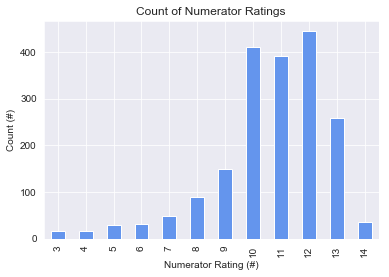

In [174]:
# Use a bar chart, because the Numerator Ratings are discrete values. We shouldn't imply that there are ranges in between
# the integers by using a histogram

ax_1 = twitter_archive_master['rating_numerator'].value_counts().sort_index().plot.bar(color='cornflowerblue')

ax_1.set_xlabel('Numerator Rating (#)')
ax_1.set_ylabel('Count (#)')
plt.title('Count of Numerator Ratings');

### retweet_count and favorite_count

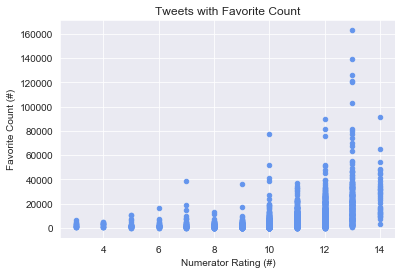

In [175]:
ax_2 = twitter_archive_master.plot(x='rating_numerator', y='favorite_count', kind='scatter', color='cornflowerblue');

ax_2.set_xlabel('Numerator Rating (#)')
ax_2.set_ylabel('Favorite Count (#)')
plt.title('Tweets with Favorite Count');

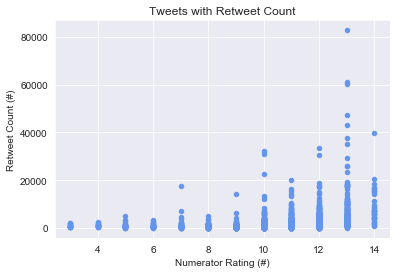

In [176]:
ax_3 = twitter_archive_master.plot(x='rating_numerator', y='retweet_count', kind='scatter', color='cornflowerblue')

ax_3.set_xlabel('Numerator Rating (#)')
ax_3.set_ylabel('Retweet Count (#)')
plt.title('Tweets with Retweet Count');

In [177]:
twitter_archive_master[['rating_numerator', 'favorite_count']].corr()

,rating_numerator,favorite_count
rating_numerator,1.000000,0.409684
favorite_count,0.409684,1.000000


In [178]:
twitter_archive_master[['rating_numerator', 'retweet_count']].corr()

,rating_numerator,retweet_count
rating_numerator,1.000000,0.307779
retweet_count,0.307779,1.000000


Interpretation: Both favorite_count and retweet_count appear to be somewhat correlated. A high rating_numerator value doesn't necessarily mean that it will be retweeted or favorited. This shows that a tweet can get a high rating and not retweeted, but is more likely to be rewteeted or favorited if it's at a higher rating.

In [179]:
twitter_archive_master['retweet_count'].value_counts().sort_values(ascending=False)

862      5
127      4
598      4
57       4
321      4
1042     4
525      4
528      3
235      3
1009     3
377      3
529      3
242      3
693      3
772      3
239      3
561      3
572      3
1002     3
994      3
551      3
1523     3
275      3
740      3
1776     3
374      3
1549     3
784      3
2085     3
1007     3
        ..
1907     1
12149    1
10102    1
1519     1
1914     1
54       1
1954     1
9664     1
3983     1
1516     1
7663     1
1205     1
3783     1
1738     1
1413     1
6040     1
1931     1
303      1
1937     1
1953     1
80       1
3987     1
1942     1
29404    1
1658     1
3972     1
17224    1
6263     1
6047     1
2359     1
Name: retweet_count, Length: 1554, dtype: int64

In [180]:
twitter_archive_master['favorite_count'].value_counts().sort_values(ascending=False)

329      4
441      3
302      3
2567     3
122      3
2320     3
4732     3
2521     3
3638     3
2981     3
2419     3
1434     3
7618     2
448      2
2430     2
5450     2
397      2
1450     2
2638     2
2326     2
1918     2
2918     2
442      2
2735     2
1557     2
1515     2
1217     2
10647    2
720      2
3516     2
        ..
1921     1
1983     1
4026     1
3814     1
9979     1
16276    1
518      1
2554     1
7914     1
26349    1
7918     1
3407     1
2720     1
12022    1
1783     1
3834     1
857      1
4024     1
32263    1
7077     1
9987     1
7942     1
9991     1
1510     1
18295    1
3960     1
4016     1
12210    1
1973     1
2807     1
Name: favorite_count, Length: 1793, dtype: int64

Probably too many different types of data to look at a bar chart (i.e. figure out if a specific dog type got the most retweets and favorites)

### rating_numerator

In [181]:
twitter_archive_master['rating_numerator'].value_counts().sort_index()

3     17 
4     16 
5     30 
6     31 
7     48 
8     89 
9     150
10    410
11    392
12    444
13    259
14    36 
Name: rating_numerator, dtype: int64

Interpretation: This shows that we have many more dogs rating over a 10. Since we purposefully removed ratings under a 3 (Must have not been "good dogs, Brent") to filter out tweets that didn't show dogs, we don't see any ratings of 0, 1, or 2. 

In [182]:
twitter_archive_master['max_conf'] = twitter_archive_master[['p1_conf', 'p2_conf', 'p3_conf']].max(axis=1)

In [183]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,expanded_urls,dogtionary,extracted_url,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,max_conf
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,https://twitter.com/dog_rates/status/892420643555336193/photo/1,,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,0.097049
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,https://twitter.com/dog_rates/status/892177421306343426/photo/1,,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,0.323581
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,https://twitter.com/dog_rates/status/891815181378084864/photo/1,,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,0.716012
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,https://twitter.com/dog_rates/status/891689557279858688/photo/1,,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,0.170278
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,https://twitter.com/dog_rates/status/891327558926688256/photo/1,,https://twitter.com/dog_rates/status/891327558926688256/photo/1,...,basset,0.555712,True,english_springer,0.225770,True,german_short_haired_pointer,0.175219,True,0.555712


### Types of dogs with the highest ratings

In [184]:
for i in twitter_archive_master.index:
        
    if twitter_archive_master.loc[i, 'p1_conf'] == twitter_archive_master.loc[i, 'max_conf']:
        twitter_archive_master.at[i, 'max_dog'] = twitter_archive_master.at[i, 'p1']
    elif twitter_archive_master.loc[i, 'p2_conf'] == twitter_archive_master.loc[i, 'max_conf']:
        twitter_archive_master.at[i, 'max_dog'] = twitter_archive_master.at[i, 'p2']
    elif twitter_archive_master.loc[i, 'p3_conf'] == twitter_archive_master.loc[i, 'max_conf']:
        twitter_archive_master.at[i, 'max_dog'] = twitter_archive_master.at[i, 'p3']
    else:
        twitter_archive_master.at[i, 'max_dog'] = None

In [185]:
twitter_archive_master[['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'max_conf', 'max_dog']].sample(5)

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,max_conf,max_dog
1545,german_short_haired_pointer,0.935771,True,kelpie,0.022561,True,labrador_retriever,0.008847,True,0.935771,german_short_haired_pointer
1428,doormat,0.201346,False,dishwasher,0.191749,False,microwave,0.038110,False,0.201346,doormat
1201,pembroke,0.430544,True,red_fox,0.206576,False,pomeranian,0.154352,True,0.430544,pembroke
127,cardigan,0.583936,True,pembroke,0.055979,True,beagle,0.045896,True,0.583936,cardigan
1450,labrador_retriever,0.407430,True,malinois,0.077037,True,pug,0.074597,True,0.407430,labrador_retriever


In [186]:
top_dawgs_1 = twitter_archive_master[twitter_archive_master['rating_numerator'] > 11]['max_dog'].value_counts()

In [187]:
x_row_1 = list(top_dawgs_1.nlargest(10).index)

for i in range(len(x_row_1)):
    x_row_1[i] = x_row_1[i].replace('_', ' ')
    x_row_1[i] = x_row_1[i].title()

In [188]:
x_row_1

['Golden Retriever',
 'Pembroke',
 'Labrador Retriever',
 'Chihuahua',
 'Chow',
 'Samoyed',
 'Toy Poodle',
 'Pomeranian',
 'Cocker Spaniel',
 'French Bulldog']

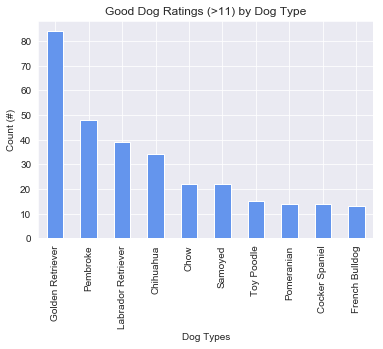

In [189]:
ax_4 = top_dawgs_1.nlargest(10).plot.bar(color='cornflowerblue')

ax_4.set_xlabel('Dog Types')
ax_4.set_ylabel('Count (#)')
ax_4.set_xticklabels(x_row_1)
plt.title('Good Dog Ratings (>11) by Dog Type');

In [190]:
top_dawgs_1.nlargest(10)

golden_retriever      84
pembroke              48
labrador_retriever    39
chihuahua             34
chow                  22
samoyed               22
toy_poodle            15
pomeranian            14
cocker_spaniel        14
french_bulldog        13
Name: max_dog, dtype: int64

Interpretation: The top dawgs in our dataset, as defined by which ones received higher ratings. Both Golden Retrievers and Labrador Retrievers seem to top the charts for top ratings.

In [191]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1922 entries, 0 to 1921
Data columns (total 25 columns):
tweet_id              1922 non-null object
timestamp             1922 non-null datetime64[ns]
source                1922 non-null object
text                  1922 non-null object
rating_numerator      1922 non-null int64
rating_denominator    1922 non-null int64
name                  1922 non-null object
expanded_urls         1922 non-null object
dogtionary            1922 non-null object
extracted_url         1922 non-null object
favorite_count        1922 non-null int64
retweet_count         1922 non-null int64
jpg_url               1922 non-null object
img_num               1922 non-null int64
p1                    1922 non-null object
p1_conf               1922 non-null float64
p1_dog                1922 non-null bool
p2                    1922 non-null object
p2_conf               1922 non-null float64
p2_dog                1922 non-null bool
p3                    1922 non-n

In [192]:
# More EDA
# See if a particular dog type got the most retweets and favorites

top_dawgs_2 = twitter_archive_master.groupby(['max_dog'])['retweet_count'].count().sort_values(ascending=False)[0:10]

top_dawgs_2

max_dog
golden_retriever      134
labrador_retriever    91 
pembroke              88 
chihuahua             75 
pug                   54 
chow                  40 
samoyed               39 
pomeranian            37 
toy_poodle            37 
malamute              29 
Name: retweet_count, dtype: int64

In [193]:
top_dawgs_3 = twitter_archive_master.groupby(['max_dog'])['favorite_count'].count().sort_values(ascending=False)[0:10]

top_dawgs_3

max_dog
golden_retriever      134
labrador_retriever    91 
pembroke              88 
chihuahua             75 
pug                   54 
chow                  40 
samoyed               39 
pomeranian            37 
toy_poodle            37 
malamute              29 
Name: favorite_count, dtype: int64

In [194]:
# Same order when looking at both retweet_count and favorite_count
# Therefore, we'll just plot one bar chart

x_row_2 = list(top_dawgs_2.nlargest(10).index)

for i in range(len(x_row_2)):
    x_row_2[i] = x_row_2[i].replace('_', ' ')
    x_row_2[i] = x_row_2[i].title()

In [195]:
x_row_2

['Golden Retriever',
 'Labrador Retriever',
 'Pembroke',
 'Chihuahua',
 'Pug',
 'Chow',
 'Samoyed',
 'Pomeranian',
 'Toy Poodle',
 'Malamute']

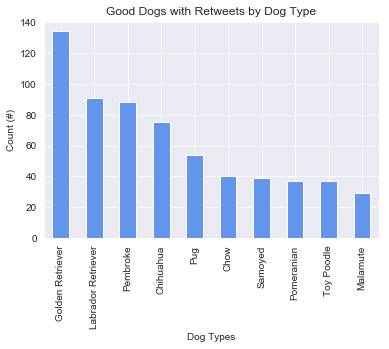

In [196]:
ax_5 = top_dawgs_2.nlargest(10).plot.bar(color='cornflowerblue')

ax_5.set_xlabel('Dog Types')
ax_5.set_ylabel('Count (#)')
ax_5.set_xticklabels(x_row_2)
plt.title('Good Dogs with Retweets by Dog Type');

In [197]:
twitter_archive_master['all_false'] = (~twitter_archive_master['p1_dog']) & (~twitter_archive_master['p2_dog']) & (~twitter_archive_master['p3_dog'])

In [198]:
bad_preds = twitter_archive_master[twitter_archive_master['all_false'] == True]

bad_preds.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,expanded_urls,dogtionary,extracted_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,max_conf,max_dog,all_false
1060,700796979434098688,2016-02-19 21:39:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Daniel. He's a neat pup. Exotic af. Custom paws. Leaps unannounced. Would totally pet. 7/10 daaamn Daniel https://t.co/5XaR0kj8cr,7,10,Daniel,https://twitter.com/dog_rates/status/700796979434098688/photo/1,,https://twitter.com/dog_rates/status/700796979434098688/photo/1,...,False,tree_frog,0.280212,False,bullfrog,0.040177,False,0.652712,tailed_frog,True
841,729854734790754305,2016-05-10 02:05:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Ollie. He conducts this train. He also greets you as you enter. Kind af. 11/10 would pet so firmly https://t.co/jVxOGKEU0z,11,10,Ollie,https://twitter.com/dog_rates/status/729854734790754305/photo/1,,https://twitter.com/dog_rates/status/729854734790754305/photo/1,...,False,china_cabinet,0.053901,False,passenger_car,0.052665,False,0.359586,doormat,True
1580,672970152493887488,2015-12-05 02:46:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Chet. He's having a hard time. Really struggling. 7/10 hang in there pupper https://t.co/eb4ta0xtnd,7,10,Chet,https://twitter.com/dog_rates/status/672970152493887488/photo/1,pupper,https://twitter.com/dog_rates/status/672970152493887488/photo/1,...,False,rhinoceros_beetle,0.139698,False,crayfish,0.058034,False,0.340154,leaf_beetle,True
329,819006400881917954,2017-01-11 02:21:57,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sunny. She was also a very good First Doggo. 14/10 would also be an absolute honor to pet https://t.co/YOC1fHFCSb,14,10,Sunny,https://twitter.com/dog_rates/status/819006400881917954/photo/1,,https://twitter.com/dog_rates/status/819006400881917954/photo/1,...,False,palace,0.020089,False,umbrella,0.007850,False,0.907083,prison,True
1527,674063288070742018,2015-12-08 03:09:46,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Earl. Earl is lost. Someone help Earl. He has no tags. Just trying to get home. 5/10 hang in there Earl https://t.co/1ZbfqAVDg6,5,10,Earl,https://twitter.com/dog_rates/status/674063288070742018/photo/1,,https://twitter.com/dog_rates/status/674063288070742018/photo/1,...,False,bearskin,0.214879,False,swab,0.064456,False,0.661176,ostrich,True


In [199]:
twitter_archive_master['rating_numerator'].describe()

count    1922.000000
mean     10.645161  
std      2.023804   
min      3.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      14.000000  
Name: rating_numerator, dtype: float64

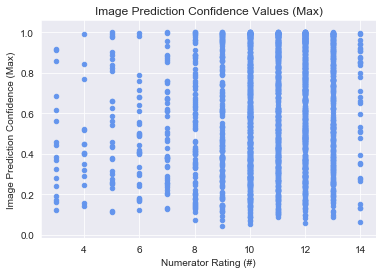

In [200]:
ax_6 = twitter_archive_master.plot.scatter('rating_numerator', 'max_conf', color='cornflowerblue')

ax_6.set_xlabel('Numerator Rating (#)')
ax_6.set_ylabel('Image Prediction Confidence (Max)')
plt.title('Image Prediction Confidence Values (Max)');

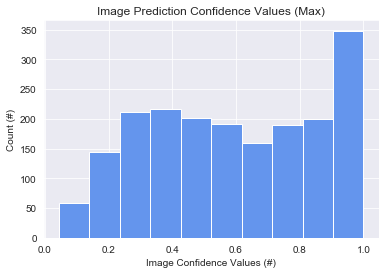

In [201]:
ax_7 = twitter_archive_master['max_conf'].hist(bins=10, color='cornflowerblue')

ax_7.set_xlabel('Image Confidence Values (#)')
ax_7.set_ylabel('Count (#)')
plt.title('Image Prediction Confidence Values (Max)');

Interpretation: The scatter plot shows how image prediction confidence are attached to numerator ratings. The histogram just shows that we have image prediction confidence values over the entire range, and doesn't differentiate whether a large number of ratings occurred under certain numerator ratings.

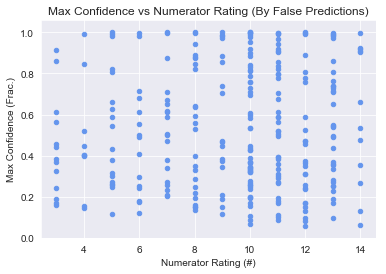

In [202]:
ax_8 = bad_preds.plot.scatter('rating_numerator', 'max_conf', color='cornflowerblue')

ax_8.set_xlabel('Numerator Rating (#)')
ax_8.set_ylabel('Max Confidence (Frac.)')
plt.title('Max Confidence vs Numerator Rating (By False Predictions)');

Interpretation: Since we picked the max confidence value found in either p1_conf, p2_conf, or p3_conf, we can see that we don't just see bad image predictions for tweets with lower numerator ratings. We can see a sizeable amount of 13s and 14s with false predictions. 

In [203]:
# 0.15 is an arbitrary lower threshold. When we picked 0.05 or 0.10, we didn't get a lot of data points

bad_preds_2 = twitter_archive_master[twitter_archive_master['max_conf'] < 0.15]

bad_preds_2

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,expanded_urls,dogtionary,extracted_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,max_conf,max_dog,all_false
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,https://twitter.com/dog_rates/status/892420643555336193/photo/1,,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,False,bagel,0.085851,False,banana,0.076110,False,0.097049,orange,True
21,887517139158093824,2017-07-19 03:39:09,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,14,10,such,https://twitter.com/dog_rates/status/887517139158093824/video/1,,https://twitter.com/dog_rates/status/887517139158093824/video/1,...,False,tow_truck,0.029175,False,shopping_cart,0.026321,False,0.130432,limousine,True
55,880095782870896641,2017-06-28 16:09:20,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please don't send in photos without dogs in them. We're not @porch_rates. Insubordinate and churlish. Pretty good porch tho 11/10 https://t.co/HauE8M3Bu4,11,10,None,https://twitter.com/dog_rates/status/880095782870896641/photo/1,,https://twitter.com/dog_rates/status/880095782870896641/photo/1,...,True,rhodesian_ridgeback,0.106395,True,beagle,0.106073,True,0.120298,miniature_pinscher,False
125,861288531465048066,2017-05-07 18:36:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",HI. MY. NAME. IS. BOOMER. AND. I. WANT. TO. SAY. IT'S. H*CKIN. RIDICULOUS. THAT. DOGS. CAN'T VOTE. ABSOLUTE. CODSWALLUP. THANK. YOU. 13/10 https://t.co/SqKJPwbQ2g,13,10,None,https://twitter.com/dog_rates/status/861288531465048066/video/1,,https://twitter.com/dog_rates/status/861288531465048066/video/1,...,False,oxygen_mask,0.106684,False,bouvier_des_flandres,0.082610,True,0.144712,syringe,False
182,847116187444137987,2017-03-29 16:00:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Unbelievable... We. Only. Rate. Dogs. Please stop sending in other things like this Blossoming Flop Kangaroo. Thank you... 11/10 https://t.co/EeeErAbso0,11,10,None,https://twitter.com/dog_rates/status/847116187444137987/photo/1,,https://twitter.com/dog_rates/status/847116187444137987/photo/1,...,False,american_staffordshire_terrier,0.113434,True,dingo,0.081231,False,0.128935,white_wolf,False
227,836380477523124226,2017-02-28 01:00:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Ava. She just blasted off. Streamline af. Aerodynamic as h*ck. One small step for pupper, one giant leap for pupkind. 12/10 https://t.co/W4KffrdX3Q",12,10,Ava,https://twitter.com/dog_rates/status/836380477523124226/photo/1,pupper,https://twitter.com/dog_rates/status/836380477523124226/photo/1,...,False,sliding_door,0.061017,False,grand_piano,0.055086,False,0.082489,wooden_spoon,True
251,832273440279240704,2017-02-16 17:00:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Smiley. He's a blind therapy doggo having a h*ckin blast high steppin around in the snow. 14/10 would follow anywhere https://t.co/SHAb1wHjMz,14,10,Smiley,https://twitter.com/dog_rates/status/832273440279240704/video/1,doggo,https://twitter.com/dog_rates/status/832273440279240704/video/1,...,True,ice_bear,0.051928,False,pug,0.044311,True,0.134081,pembroke,False
275,828408677031882754,2017-02-06 01:03:14,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bear. He went outside to play in the snow. Needed a break from the game. Feeling a tad better now. 12/10 deep

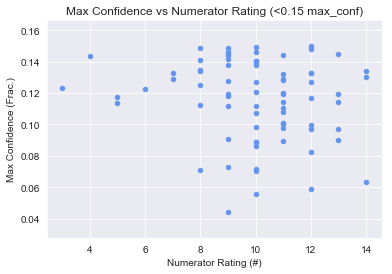

In [204]:
ax_9 = bad_preds_2.plot.scatter('rating_numerator', 'max_conf', color='cornflowerblue')

ax_9.set_xlabel('Numerator Rating (#)')
ax_9.set_ylabel('Max Confidence (Frac.)')
plt.title('Max Confidence vs Numerator Rating (<0.15 max_conf)');

Interpretation: We can see low Image Prediction confidence values below 0.2 for Numerator Ratings within a range of 7 to 14. No immediate conclusions jump out based on this plot.

In [205]:
good_preds = twitter_archive_master[twitter_archive_master['max_conf'] > 0.95]

good_preds

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,expanded_urls,dogtionary,extracted_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,max_conf,max_dog,all_false
10,890006608113172480,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme,13,10,Koda,https://twitter.com/dog_rates/status/890006608113172480/photo/1,,https://twitter.com/dog_rates/status/890006608113172480/photo/1,...,True,pomeranian,1.388350e-02,True,chow,8.167480e-03,True,0.957979,samoyed,False
12,889665388333682689,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,13,10,None,https://twitter.com/dog_rates/status/889665388333682689/photo/1,puppo,https://twitter.com/dog_rates/status/889665388333682689/photo/1,...,True,cardigan,2.735570e-02,True,basenji,4.633230e-03,True,0.966327,pembroke,False
13,889638837579907072,2017-07-25 00:10:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ted. He does his best. Sometimes that's not enough. But it's ok. 12/10 would assist https://t.co/f8dEDcrKSR,12,10,Ted,https://twitter.com/dog_rates/status/889638837579907072/photo/1,,https://twitter.com/dog_rates/status/889638837579907072/photo/1,...,True,boxer,2.128640e-03,True,staffordshire_bullterrier,1.498180e-03,True,0.991650,french_bulldog,False
14,889531135344209921,2017-07-24 17:02:04,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq,13,10,Stuart,https://twitter.com/dog_rates/status/889531135344209921/photo/1,puppo,https://twitter.com/dog_rates/status/889531135344209921/photo/1,...,True,labrador_retriever,1.383410e-02,True,redbone,7.957750e-03,True,0.953442,golden_retriever,False
19,888078434458587136,2017-07-20 16:49:33,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gerald. He was just told he didn't get the job he interviewed for. A h*ckin injustice. 12/10 didn't want the job anyway https://t.co/DK7iDPfuRX,12,10,Gerald,https://twitter.com/dog_rates/status/888078434458587136/photo/1,,https://twitter.com/dog_rates/status/888078434458587136/photo/1,...,True,pug,9.319080e-04,True,bull_mastiff,9.032110e-04,True,0.995026,french_bulldog,False
28,886366144734445568,2017-07-15 23:25:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Roscoe. Another pupper fallen victim to spontaneous tongue ejections. Get the BlepiPen immediate. 12/10 deep breaths Roscoe https://t.co/RGE08MIJox,12,10,Roscoe,https://twitter.com/dog_rates/status/886366144734445568/photo/1,pupper,https://twitter.com/dog_rates/status/886366144734445568/photo/1,...,True,chihuahua,3.611780e-04,True,boston_bull,7.556160e-05,True,0.999201,french_bulldog,False
30,885984800019947520,2017-07-14 22:10:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion advised. This is Jimbo. He will rip ur finger right h*ckin off. Other dog clearly an accessory. 12/10 pls pet with caution https://t.co/BuveP0uMF1,12,10,Jimbo,https://twitter.com/dog_rates/status/885984800019947520/photo/1,,https://twitter.com/dog_rates/status/885984800019947520/photo/1,...,True,shih_tzu,6.630120e-03,True,bernese_mountain_dog,6.239150e-03,True,0.972494,blenheim_spaniel,False
36,884441805382717440,2017-07-10 15:58:53,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I present to you, Pup in Hat. Pup in Hat is great for all occasions.

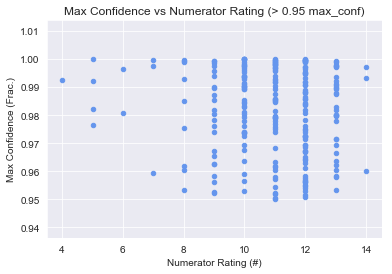

In [206]:
ax_10 = good_preds.plot.scatter('rating_numerator', 'max_conf', color='cornflowerblue')

ax_10.set_xlabel('Numerator Rating (#)')
ax_10.set_ylabel('Max Confidence (Frac.)')
plt.title('Max Confidence vs Numerator Rating (> 0.95 max_conf)');

Interpretation: When the image predictor has a high confidence for the image, it tends to be for tweets with a rating above 9. This is not necessarily true for ratings at the lower end of image prediction confidence values. We still see higher dog ratings when the image predictor confidence values are less than 0.15. 

### Dogtionary terms

In [207]:
dogtionary_group = twitter_archive_master.groupby('rating_numerator')['dogtionary'].count()

In [208]:
dogtionary_group

rating_numerator
3     17 
4     16 
5     30 
6     31 
7     48 
8     89 
9     150
10    410
11    392
12    444
13    259
14    36 
Name: dogtionary, dtype: int64

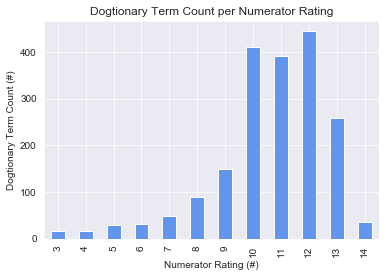

In [209]:
ax_11 = dogtionary_group.plot.bar(color='cornflowerblue')

ax_11.set_xlabel('Numerator Rating (#)')
ax_11.set_ylabel('Dogtionary Term Count (#)')
plt.title('Dogtionary Term Count per Numerator Rating');

Interpretation: Looks like a tweet with a dogtionary term is more likely to be associated with a higher rating. 